In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [36]:
df21 = pd.read_csv('microdados_ed_basica_2021.csv', encoding='latin-1', sep=';',low_memory=False)
df20 = pd.read_csv('microdados_ed_basica_2020.csv', encoding='latin-1', sep=';',low_memory=False)
df19 = pd.read_csv('microdados_ed_basica_2019.csv', encoding='latin-1', sep=';',low_memory=False)
df18 = pd.read_csv('microdados_ed_basica_2018.csv', encoding='latin-1', sep=';',low_memory=False)
df17 = pd.read_csv('microdados_ed_basica_2017.csv', encoding='latin-1', sep=';',low_memory=False)

# Junção das tabelas e criação da variável fluxo.
A diferença entre o número de professores em cada foi indicada como um fluxo, a média entre o fluxo entre os anos é variável alvo da análise, criada abaixo:

In [37]:
# Troca de nome da variável: futuramente, substituir por outra função.
df21["QT_DOC_FUND21"] = df21["QT_DOC_FUND"]
df21["QT_DOC_MED21"] = df21["QT_DOC_MED"]
df20["QT_DOC_FUND20"] = df20["QT_DOC_FUND"]
df20["QT_DOC_MED20"] = df20["QT_DOC_MED"]
df19["QT_DOC_FUND19"] = df19["QT_DOC_FUND"]
df19["QT_DOC_MED19"] = df19["QT_DOC_MED"]
df18["QT_DOC_FUND18"] = df18["QT_DOC_FUND"]
df18["QT_DOC_MED18"] = df18["QT_DOC_MED"]
df17["QT_DOC_FUND17"] = df17["QT_DOC_FUND"]
df17["QT_DOC_MED17"] = df17["QT_DOC_MED"]

In [38]:
ano21 = df21[['CO_ENTIDADE','QT_DOC_FUND21','QT_DOC_MED21']]
ano21 = ano21.dropna()
ano20 = df20[['CO_ENTIDADE','QT_DOC_FUND20','QT_DOC_MED20']]
ano20 = ano20.dropna()
ano19 = df19[['CO_ENTIDADE','QT_DOC_FUND19','QT_DOC_MED19']]
ano19 = ano19.dropna()
ano18 = df18[['CO_ENTIDADE','QT_DOC_FUND18','QT_DOC_MED18']]
ano18 = ano18.dropna()
ano17 = df17[['CO_ENTIDADE','QT_DOC_FUND17','QT_DOC_MED17']]
ano19 = ano19.dropna()


In [39]:
fluxo = ano21.merge(ano20, on = 'CO_ENTIDADE', how = 'inner')
fluxo2 = ano20.merge(ano19, on = 'CO_ENTIDADE', how = 'inner')
fluxo3 = ano19.merge(ano18, on = 'CO_ENTIDADE', how = 'inner')
fluxo4 = ano18.merge(ano17, on = 'CO_ENTIDADE', how = 'inner')
fluxo5 = ano21.merge(ano17, on = 'CO_ENTIDADE', how = 'inner')
# merges separados por problema de memória
# criação da varíavel fluxo entre anos: variação de docente entre anos:
fluxo['fluxo_profs_FUND21_20'] = fluxo['QT_DOC_FUND21'] - fluxo['QT_DOC_FUND20']
fluxo['fluxo_profs_MED21_20'] = fluxo['QT_DOC_MED21'] - fluxo['QT_DOC_MED20']
fluxo2['fluxo_profs_FUND20_19'] = fluxo2['QT_DOC_FUND20'] - fluxo2['QT_DOC_FUND19']
fluxo2['fluxo_profs_MED20_19'] = fluxo2['QT_DOC_MED20'] - fluxo2['QT_DOC_MED19']
fluxo3['fluxo_profs_FUND19_18'] = fluxo3['QT_DOC_FUND19'] - fluxo3['QT_DOC_FUND18']
fluxo3['fluxo_profs_MED19_18'] = fluxo3['QT_DOC_MED19'] - fluxo3['QT_DOC_MED18']
fluxo4['fluxo_profs_FUND18_17'] = fluxo4['QT_DOC_FUND18'] - fluxo4['QT_DOC_FUND17']
fluxo4['fluxo_profs_MED18_17'] = fluxo4['QT_DOC_MED18'] - fluxo4['QT_DOC_MED17']









In [40]:
fluxo_21_20 = fluxo[['CO_ENTIDADE','fluxo_profs_FUND21_20','fluxo_profs_MED21_20']]
fluxo_20_19 = fluxo2[['CO_ENTIDADE','fluxo_profs_FUND20_19','fluxo_profs_MED20_19']]
fluxo_19_18 = fluxo3[['CO_ENTIDADE','fluxo_profs_FUND19_18','fluxo_profs_MED19_18']]
fluxo_18_17 = fluxo4[['CO_ENTIDADE','fluxo_profs_FUND18_17','fluxo_profs_MED18_17']]

In [41]:
variacao = pd.DataFrame()
variacao = fluxo_21_20.merge(fluxo_20_19, on = 'CO_ENTIDADE', how = 'inner')
variacao = variacao.merge(fluxo_19_18, on = 'CO_ENTIDADE', how = 'inner')
variacao = variacao.merge(fluxo_18_17, on = 'CO_ENTIDADE', how = 'inner')


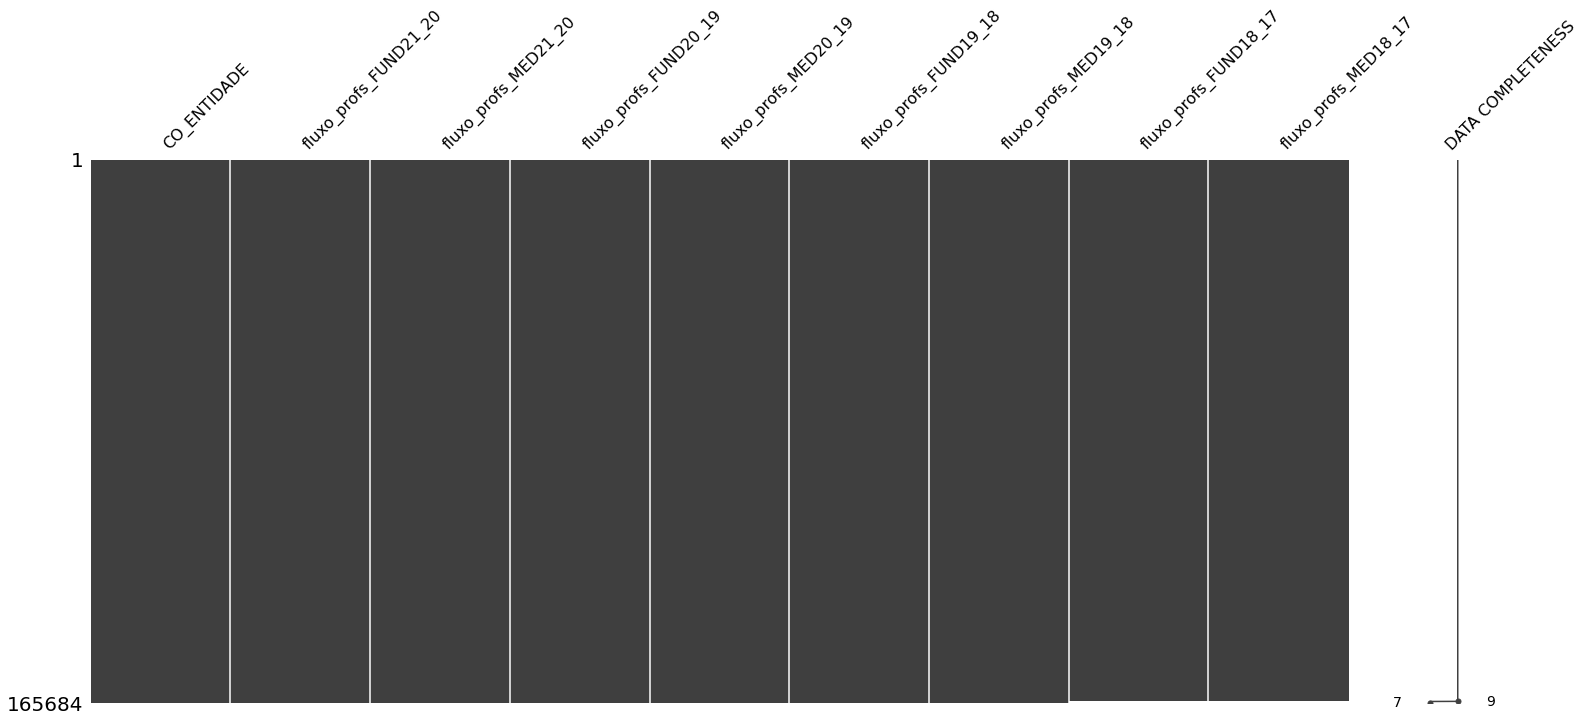

In [42]:
import missingno as msno
msno.matrix(variacao, labels=True, sort="descending");

In [43]:
variacao['taxa_fluxo_FUND'] = variacao['fluxo_profs_FUND21_20'] + variacao['fluxo_profs_FUND20_19']+variacao['fluxo_profs_FUND19_18']+variacao['fluxo_profs_FUND18_17']
variacao['taxa_fluxo_MED'] = variacao['fluxo_profs_MED21_20'] + variacao['fluxo_profs_MED20_19']+variacao['fluxo_profs_MED19_18']+variacao['fluxo_profs_MED18_17']
variacao['taxa_fluxo_FUND'] = variacao['taxa_fluxo_FUND']/4
variacao['taxa_fluxo_MED'] = variacao['taxa_fluxo_MED']/4

In [44]:
df21 = df21.merge(variacao, on = 'CO_ENTIDADE', how = 'inner')


# Análise das variáveis quantitativas:
De maneira inicial, para medir a importância das variáveis quantitativas foi traçada uma correlação, assim foi possível perceber que isoladamente os recursos quantitativos não influenciaram significativamente na saída dos professores; O ano em que ocorreu a Pandemia foi o ano de maior saída e o grupos mais afetados foram os profissionais de ensino em qualidades específicas: educação especial, básica, EJA e Profissionalizante. Nesse sentido, a análise das variáveis categóricas  mais adiante considerou esse acontecimento.

In [45]:
df21.shape

(165684, 382)

In [46]:
#definição das variáveis

In [47]:
Num = df21.select_dtypes(include="number")

In [48]:
#Num.info()

In [49]:
#Nulos = 100*df21.isna().sum().sort_values(ascending=False)/df21.shape[0]

In [50]:
correlacaonum = Num.corrwith(Num["taxa_fluxo_MED"])

In [51]:
correlacaonum = correlacaonum[correlacaonum >= 0.05]

In [52]:
correlacaonum.sort_values(ascending = False)

taxa_fluxo_MED           1.000000
QT_DOC_MED21             0.689247
QT_DOC_MED               0.689247
fluxo_profs_MED21_20     0.618874
QT_DOC_BAS               0.462230
QT_DOC_ESP_CC            0.458829
QT_DOC_ESP               0.456588
fluxo_profs_MED18_17     0.454335
QT_DOC_PROF_TEC          0.312505
QT_DOC_PROF              0.311698
QT_DOC_FUND_AF           0.267384
QT_DOC_EJA_MED           0.223122
taxa_fluxo_FUND          0.219330
QT_DOC_FUND              0.177038
QT_DOC_FUND21            0.177038
QT_DOC_EJA               0.153829
fluxo_profs_FUND21_20    0.149851
fluxo_profs_FUND18_17    0.091106
dtype: float64

In [53]:
correlacaonum2 = Num.corrwith(Num["taxa_fluxo_MED"])
correlacaonum2 = correlacaonum2[correlacaonum2 > 0.25]
correlacaonum2.sort_values(ascending = False)

taxa_fluxo_MED          1.000000
QT_DOC_MED              0.689247
QT_DOC_MED21            0.689247
fluxo_profs_MED21_20    0.618874
QT_DOC_BAS              0.462230
QT_DOC_ESP_CC           0.458829
QT_DOC_ESP              0.456588
fluxo_profs_MED18_17    0.454335
QT_DOC_PROF_TEC         0.312505
QT_DOC_PROF             0.311698
QT_DOC_FUND_AF          0.267384
dtype: float64

In [54]:
correlacaonum4 = Num.corrwith(Num["taxa_fluxo_FUND"])
correlacaonum4 = correlacaonum2[correlacaonum2 >= 0.05]
correlacaonum4.sort_values(ascending = False)

taxa_fluxo_MED          1.000000
QT_DOC_MED              0.689247
QT_DOC_MED21            0.689247
fluxo_profs_MED21_20    0.618874
QT_DOC_BAS              0.462230
QT_DOC_ESP_CC           0.458829
QT_DOC_ESP              0.456588
fluxo_profs_MED18_17    0.454335
QT_DOC_PROF_TEC         0.312505
QT_DOC_PROF             0.311698
QT_DOC_FUND_AF          0.267384
dtype: float64

In [55]:
df21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165684 entries, 0 to 165683
Columns: 382 entries, NU_ANO_CENSO to taxa_fluxo_MED
dtypes: float64(356), int64(12), object(14)
memory usage: 484.1+ MB


In [56]:
df21['TP_CATEGORIA_ESCOLA_PRIVADA'].isna().count()

165684

In [57]:
len(df21)

165684

# Feature engineering e tratamento dos dados:
As variáveis com mais de 0.5 de dados faltantes foram desconsideradas. Para fazer as variáveis finais, os dados foram categorizados e transformados para um escore, os dados com maior quantidade de condições foram tratados para identificar as excepcionalidades:
CONDIÇÕES PRECÁRIAS: Condições fundamentais inexistentes pontuaram: tratamento de lixo, esgoto e água disponível;
Nível da ESTRUTURA: excepcionalidades pontuaram, nessa variável está as informações das instalações da escola, estruturas físicas;
MATERIAL PEDAGÓGICO ESPECIAL: a existência de um material diferenciado foi considerada;
INSERÇÃO TECNOLÓGICA: excepcionalidades pontuaram, nessa variável o escore e  os materiais tecnológicos disponíveis para todos foram considerados;
SUPORTE: excepcionalidades pontuaram, aqui as algumas condições de suporte essenciais foram aferidas, como existência de um conselho, disponibilidade de alimentação;
OUTROS PROFISSIONAIS: excepcionalidades pontuaram, aqui a existência de outros profissionais de apoio foi considerada;

Após a criação  das variáveis foi possível categorizar cada uma:

- Variáveis com alto escore>3: para diminuir a amplitude dessas variáveis foi o utilizado o método de quantização, as variáveis assumiram um valor definido em relação ao intervalo do posicionamento das variáveis, dado o ROL. Sequencialmente, as variáveis foram divididas em categorias: - Relação de suficiência ou relação de variabilidade.
- Variáveis de baixo escore, as variáveis já foram categorizadas como as de alto escore.

No último tratamento, os fluxos foram tratados como uma variável binária, 0: fluxo negativo e 1: fluxo positivo

*obs: os dados faltantes foram preenchidos com a moda.



In [113]:
#dropar colunas com mais de 0.5 NA
df = df21[[column for column in df21 if df21[column].count() / len(df21) >= 0.5]]
print("List of dropped columns:", end=" ")
for c in df21.columns:
    if c not in df.columns:
        print(c, end=", ")
print('\n')

#VERIFICAR MELHOR DEPOIS

List of dropped columns: TP_CATEGORIA_ESCOLA_PRIVADA, DS_COMPLEMENTO, IN_CONVENIADA_PP, TP_CONVENIO_PODER_PUBLICO, IN_MANT_ESCOLA_PRIVADA_EMP, IN_MANT_ESCOLA_PRIVADA_ONG, IN_MANT_ESCOLA_PRIVADA_OSCIP, IN_MANT_ESCOLA_PRIV_ONG_OSCIP, IN_MANT_ESCOLA_PRIVADA_SIND, IN_MANT_ESCOLA_PRIVADA_SIST_S, IN_MANT_ESCOLA_PRIVADA_S_FINS, NU_CNPJ_ESCOLA_PRIVADA, NU_CNPJ_MANTENEDORA, CO_ESCOLA_SEDE_VINCULADA, CO_IES_OFERTANTE, IN_LOCAL_FUNC_SALAS_EMPRESA, IN_LOCAL_FUNC_TEMPLO_IGREJA, IN_LOCAL_FUNC_CASA_PROFESSOR, TP_OCUPACAO_GALPAO, IN_AGUA_FILTRADA, IN_ENERGIA_GERADOR, IN_ENERGIA_OUTROS, IN_LIXO_JOGA_OUTRA_AREA, IN_LIXO_OUTROS, IN_LIXO_RECICLA, IN_BANHEIRO_FORA_PREDIO, IN_BANHEIRO_DENTRO_PREDIO, IN_BERCARIO, IN_DEPENDENCIAS_PNE, IN_LAVANDERIA, QT_SALAS_EXISTENTES, IN_EQUIP_VIDEOCASSETE, IN_EQUIP_RETROPROJETOR, IN_EQUIP_FAX, IN_EQUIP_FOTO, QT_EQUIP_VIDEOCASSETE, QT_EQUIP_PARABOLICA, QT_EQUIP_COPIADORA, QT_EQUIP_RETROPROJETOR, QT_EQUIP_IMPRESSORA, QT_EQUIP_IMPRESSORA_MULT, QT_EQUIP_FAX, QT_EQUIP_FOTO, QT_

In [114]:
#df = df.loc[df21["TP_DEPENDENCIA"] == 3]

In [115]:
#df = df.loc[df21["IN_CONVENIADA_PP"] == 1]

In [116]:
df21.head()

,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,NO_MESORREGIAO,CO_MESORREGIAO,...,fluxo_profs_FUND21_20,fluxo_profs_MED21_20,fluxo_profs_FUND20_19,fluxo_profs_MED20_19,fluxo_profs_FUND19_18,fluxo_profs_MED19_18,fluxo_profs_FUND18_17,fluxo_profs_MED18_17,taxa_fluxo_FUND,taxa_fluxo_MED
0,2021,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,1102,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
1,2021,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,1102,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
2,2021,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,1102,...,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-0.25,0.0
3,2021,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,1102,...,1.0,0.0,2.0,0.0,-2.0,0.0,0.0,0.0,0.25,0.0
4,2021,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,1102,...,2.0,0.0,-1.0,0.0,-2.0,0.0,-1.0,0.0,-0.50,0.0


In [117]:
df_int = df.select_dtypes(include='int64')
df_categorical = df.select_dtypes(include='object')
df_float = df.select_dtypes(include='float')

In [118]:
df_int_cols = df_int.columns.tolist()
df_categorical_cols = df_categorical.columns.tolist()
df_float_cols = df_float.columns.tolist()

In [119]:
df_int_cols

['NU_ANO_CENSO',
 'CO_REGIAO',
 'CO_UF',
 'CO_MUNICIPIO',
 'CO_MESORREGIAO',
 'CO_MICRORREGIAO',
 'CO_DISTRITO',
 'CO_ENTIDADE',
 'TP_DEPENDENCIA',
 'TP_LOCALIZACAO',
 'CO_CEP',
 'TP_SITUACAO_FUNCIONAMENTO']

In [120]:
df= df.drop(columns=['CO_REGIAO', 'CO_UF', 'CO_MUNICIPIO','CO_MESORREGIAO', 'CO_MICRORREGIAO','CO_DISTRITO','CO_DISTRITO','CO_CEP'

])

In [121]:
df_categorical_cols

['NO_REGIAO',
 'NO_UF',
 'SG_UF',
 'NO_MUNICIPIO',
 'NO_MESORREGIAO',
 'NO_MICRORREGIAO',
 'NO_ENTIDADE',
 'DS_ENDERECO',
 'NU_ENDERECO',
 'NO_BAIRRO',
 'CO_ORGAO_REGIONAL',
 'DT_ANO_LETIVO_INICIO',
 'DT_ANO_LETIVO_TERMINO']

In [122]:
df= df.drop(columns=[
 'NO_UF',
 'DS_ENDERECO',
 'NU_ENDERECO',
 'NO_BAIRRO',
 'CO_ORGAO_REGIONAL',
 'DT_ANO_LETIVO_INICIO',
 'DT_ANO_LETIVO_TERMINO'])#'NO_REGIAO',
 #'NO_UF',
 #'NO_MESORREGIAO',
 #'NO_MICRORREGIAO'

In [123]:
df_float_cols

['TP_LOCALIZACAO_DIFERENCIADA',
 'NU_DDD',
 'NU_TELEFONE',
 'IN_VINCULO_SECRETARIA_EDUCACAO',
 'IN_VINCULO_SEGURANCA_PUBLICA',
 'IN_VINCULO_SECRETARIA_SAUDE',
 'IN_VINCULO_OUTRO_ORGAO',
 'TP_REGULAMENTACAO',
 'TP_RESPONSAVEL_REGULAMENTACAO',
 'IN_LOCAL_FUNC_PREDIO_ESCOLAR',
 'TP_OCUPACAO_PREDIO_ESCOLAR',
 'IN_LOCAL_FUNC_SOCIOEDUCATIVO',
 'IN_LOCAL_FUNC_UNID_PRISIONAL',
 'IN_LOCAL_FUNC_PRISIONAL_SOCIO',
 'IN_LOCAL_FUNC_GALPAO',
 'IN_LOCAL_FUNC_SALAS_OUTRA_ESC',
 'IN_LOCAL_FUNC_OUTROS',
 'IN_PREDIO_COMPARTILHADO',
 'IN_AGUA_POTAVEL',
 'IN_AGUA_REDE_PUBLICA',
 'IN_AGUA_POCO_ARTESIANO',
 'IN_AGUA_CACIMBA',
 'IN_AGUA_FONTE_RIO',
 'IN_AGUA_INEXISTENTE',
 'IN_ENERGIA_REDE_PUBLICA',
 'IN_ENERGIA_GERADOR_FOSSIL',
 'IN_ENERGIA_RENOVAVEL',
 'IN_ENERGIA_INEXISTENTE',
 'IN_ESGOTO_REDE_PUBLICA',
 'IN_ESGOTO_FOSSA_SEPTICA',
 'IN_ESGOTO_FOSSA_COMUM',
 'IN_ESGOTO_FOSSA',
 'IN_ESGOTO_INEXISTENTE',
 'IN_LIXO_SERVICO_COLETA',
 'IN_LIXO_QUEIMA',
 'IN_LIXO_ENTERRA',
 'IN_LIXO_DESTINO_FINAL_PUBLICO',
 'IN_LI

In [124]:
df.shape

(165684, 306)

In [125]:
df.shape

(165684, 306)

In [126]:
df_int = df21.select_dtypes(include='int64')
df_categorical = df21.select_dtypes(include='object')
df_float = df21.select_dtypes(include='float')

In [127]:
df_int_cols = df_int.columns.tolist()
df_categorical_cols = df_categorical.columns.tolist()
df_float_cols = df_float.columns.tolist()

In [128]:
df_float_cols

['TP_CATEGORIA_ESCOLA_PRIVADA',
 'TP_LOCALIZACAO_DIFERENCIADA',
 'NU_DDD',
 'NU_TELEFONE',
 'IN_VINCULO_SECRETARIA_EDUCACAO',
 'IN_VINCULO_SEGURANCA_PUBLICA',
 'IN_VINCULO_SECRETARIA_SAUDE',
 'IN_VINCULO_OUTRO_ORGAO',
 'IN_CONVENIADA_PP',
 'TP_CONVENIO_PODER_PUBLICO',
 'IN_MANT_ESCOLA_PRIVADA_EMP',
 'IN_MANT_ESCOLA_PRIVADA_ONG',
 'IN_MANT_ESCOLA_PRIVADA_OSCIP',
 'IN_MANT_ESCOLA_PRIV_ONG_OSCIP',
 'IN_MANT_ESCOLA_PRIVADA_SIND',
 'IN_MANT_ESCOLA_PRIVADA_SIST_S',
 'IN_MANT_ESCOLA_PRIVADA_S_FINS',
 'NU_CNPJ_ESCOLA_PRIVADA',
 'NU_CNPJ_MANTENEDORA',
 'TP_REGULAMENTACAO',
 'TP_RESPONSAVEL_REGULAMENTACAO',
 'CO_ESCOLA_SEDE_VINCULADA',
 'CO_IES_OFERTANTE',
 'IN_LOCAL_FUNC_PREDIO_ESCOLAR',
 'TP_OCUPACAO_PREDIO_ESCOLAR',
 'IN_LOCAL_FUNC_SALAS_EMPRESA',
 'IN_LOCAL_FUNC_SOCIOEDUCATIVO',
 'IN_LOCAL_FUNC_UNID_PRISIONAL',
 'IN_LOCAL_FUNC_PRISIONAL_SOCIO',
 'IN_LOCAL_FUNC_TEMPLO_IGREJA',
 'IN_LOCAL_FUNC_CASA_PROFESSOR',
 'IN_LOCAL_FUNC_GALPAO',
 'TP_OCUPACAO_GALPAO',
 'IN_LOCAL_FUNC_SALAS_OUTRA_ESC',
 '

In [129]:
df= df.drop(columns=['TP_LOCALIZACAO_DIFERENCIADA',
 'NU_DDD',
 'NU_TELEFONE',
 'IN_VINCULO_SECRETARIA_EDUCACAO',
 'IN_VINCULO_SEGURANCA_PUBLICA',
 'IN_VINCULO_SECRETARIA_SAUDE',
 'IN_VINCULO_OUTRO_ORGAO',
 'TP_REGULAMENTACAO',
 'TP_RESPONSAVEL_REGULAMENTACAO',
 'IN_LOCAL_FUNC_PREDIO_ESCOLAR',
 'TP_OCUPACAO_PREDIO_ESCOLAR',
 'IN_LOCAL_FUNC_SOCIOEDUCATIVO',
 'IN_LOCAL_FUNC_UNID_PRISIONAL',
 'IN_LOCAL_FUNC_PRISIONAL_SOCIO',
 'IN_LOCAL_FUNC_GALPAO',
 'IN_LOCAL_FUNC_SALAS_OUTRA_ESC',
 'IN_LOCAL_FUNC_OUTROS',
 'IN_PREDIO_COMPARTILHADO'])

In [130]:
# filtrar no início por escolas públicas e criar uma variável professores por matrícula, 

In [131]:
df.shape

(165684, 288)

In [132]:
df_float

,TP_CATEGORIA_ESCOLA_PRIVADA,TP_LOCALIZACAO_DIFERENCIADA,NU_DDD,NU_TELEFONE,IN_VINCULO_SECRETARIA_EDUCACAO,IN_VINCULO_SEGURANCA_PUBLICA,IN_VINCULO_SECRETARIA_SAUDE,IN_VINCULO_OUTRO_ORGAO,IN_CONVENIADA_PP,TP_CONVENIO_PODER_PUBLICO,...,fluxo_profs_FUND21_20,fluxo_profs_MED21_20,fluxo_profs_FUND20_19,fluxo_profs_MED20_19,fluxo_profs_FUND19_18,fluxo_profs_MED19_18,fluxo_profs_FUND18_17,fluxo_profs_MED18_17,taxa_fluxo_FUND,taxa_fluxo_MED
0,NaN,2.0,69.0,36413839.0,1.0,0.0,0.0,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
1,NaN,0.0,69.0,36412656.0,1.0,0.0,0.0,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
2,NaN,0.0,69.0,36413630.0,1.0,0.0,0.0,0.0,NaN,NaN,...,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-0.25,0.0
3,NaN,0.0,69.0,36413630.0,1.0,0.0,0.0,0.0,NaN,NaN,...,1.0,0.0,2.0,0.0,-2.0,0.0,0.0,0.0,0.25,0.0
4,NaN,0.0,69.0,984311652.0,1.0,0.0,0.0,0.0,NaN,NaN,...,2.0,0.0,-1.0,0.0,-2.0,0.0,-1.0,0.0,-0.50,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165679,4.0,0.0,61.0,33931223.0,NaN,NaN,NaN,NaN,1.0,2.0,...,-5.0,0.0,-22.0,0.0,27.0,0.0,NaN,NaN,NaN,NaN
165680,4.0,0.0,61.0,30326776.0,NaN,NaN,NaN,NaN,1.0,2.0,...,-22.0,0.0,22.0,0.0,-30.0,-19.0,NaN,NaN,NaN,NaN
165681,NaN,0.0,61.0,39013692.0,1.0,0.0,0.0,0.0,NaN,NaN,...,-16.0,-13.0,1.0,13.0,15.0,0.0,NaN,NaN,NaN,NaN
165682,NaN,0.0,61.0,985708508.0,1.0,0.0,0.0,0.0,NaN,NaN,...,-10.0,0.0,-23.0,-17.0,33.0,17.0,NaN,NaN,NaN,NaN


In [133]:
correlacaonum5 = df_float.corrwith(df_float["taxa_fluxo_FUND"])
correlacaonum5 = correlacaonum5[correlacaonum5> 0.2]
correlacaonum5.sort_values(ascending = True)

taxa_fluxo_MED           0.219330
fluxo_profs_FUND18_17    0.473680
QT_DOC_ESP_CC            0.474263
QT_DOC_ESP               0.476026
QT_DOC_FUND_AI           0.479273
QT_DOC_BAS               0.491333
QT_DOC_FUND_AF           0.556266
fluxo_profs_FUND21_20    0.613841
QT_DOC_FUND              0.664643
QT_DOC_FUND21            0.664643
taxa_fluxo_FUND          1.000000
dtype: float64

In [134]:
correlacaonum6 = df_float.corrwith(df_float["taxa_fluxo_MED"])
correlacaonum6 = correlacaonum6[correlacaonum6>= 0.2]
correlacaonum6.sort_values(ascending = False)

taxa_fluxo_MED          1.000000
QT_DOC_MED              0.689247
QT_DOC_MED21            0.689247
fluxo_profs_MED21_20    0.618874
QT_DOC_BAS              0.462230
QT_DOC_ESP_CC           0.458829
QT_DOC_ESP              0.456588
fluxo_profs_MED18_17    0.454335
QT_DOC_PROF_TEC         0.312505
QT_DOC_PROF             0.311698
QT_DOC_FUND_AF          0.267384
QT_DOC_EJA_MED          0.223122
taxa_fluxo_FUND         0.219330
dtype: float64

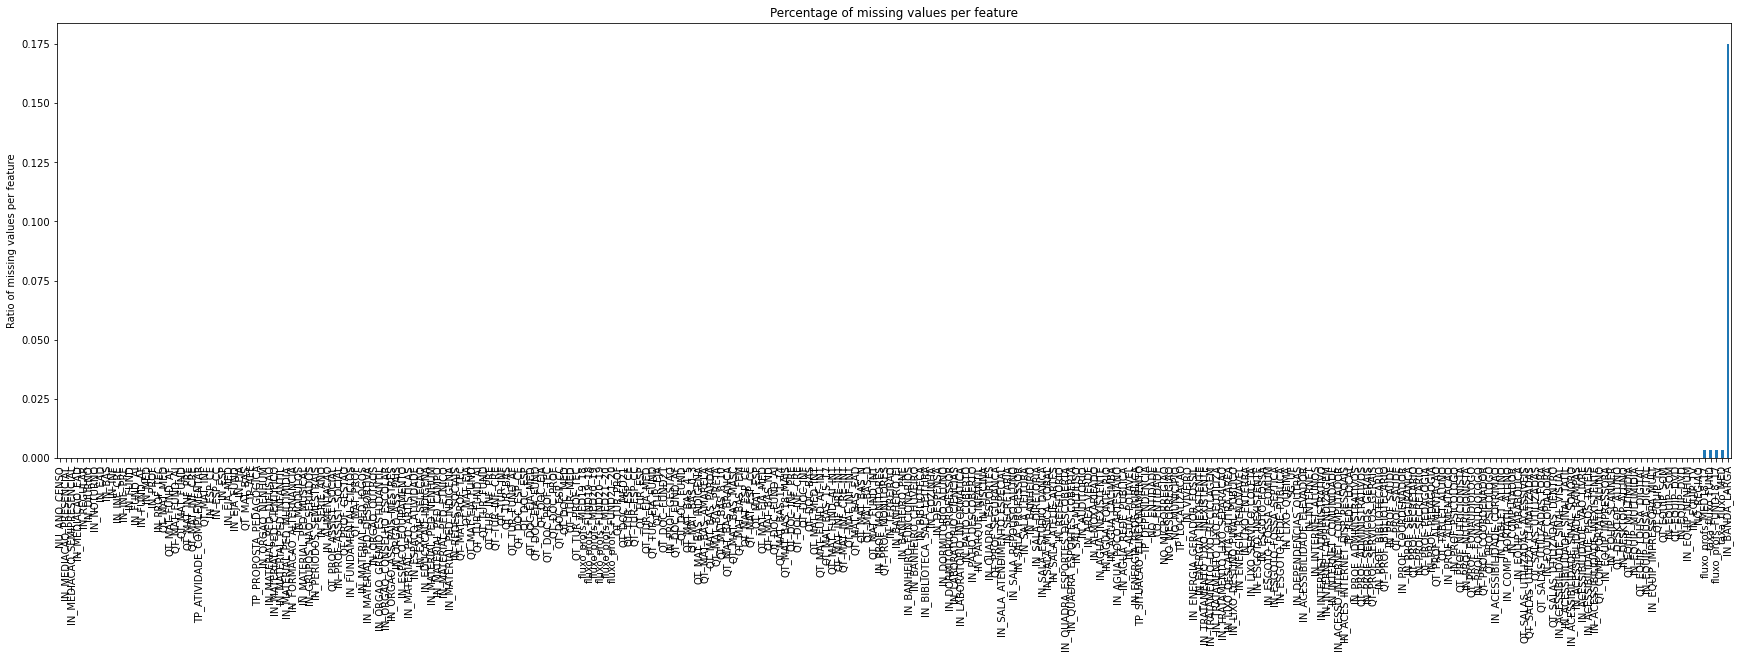

In [135]:
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(30,8),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

In [136]:
df.shape

(165684, 288)

In [137]:
df_float_cols

['TP_CATEGORIA_ESCOLA_PRIVADA',
 'TP_LOCALIZACAO_DIFERENCIADA',
 'NU_DDD',
 'NU_TELEFONE',
 'IN_VINCULO_SECRETARIA_EDUCACAO',
 'IN_VINCULO_SEGURANCA_PUBLICA',
 'IN_VINCULO_SECRETARIA_SAUDE',
 'IN_VINCULO_OUTRO_ORGAO',
 'IN_CONVENIADA_PP',
 'TP_CONVENIO_PODER_PUBLICO',
 'IN_MANT_ESCOLA_PRIVADA_EMP',
 'IN_MANT_ESCOLA_PRIVADA_ONG',
 'IN_MANT_ESCOLA_PRIVADA_OSCIP',
 'IN_MANT_ESCOLA_PRIV_ONG_OSCIP',
 'IN_MANT_ESCOLA_PRIVADA_SIND',
 'IN_MANT_ESCOLA_PRIVADA_SIST_S',
 'IN_MANT_ESCOLA_PRIVADA_S_FINS',
 'NU_CNPJ_ESCOLA_PRIVADA',
 'NU_CNPJ_MANTENEDORA',
 'TP_REGULAMENTACAO',
 'TP_RESPONSAVEL_REGULAMENTACAO',
 'CO_ESCOLA_SEDE_VINCULADA',
 'CO_IES_OFERTANTE',
 'IN_LOCAL_FUNC_PREDIO_ESCOLAR',
 'TP_OCUPACAO_PREDIO_ESCOLAR',
 'IN_LOCAL_FUNC_SALAS_EMPRESA',
 'IN_LOCAL_FUNC_SOCIOEDUCATIVO',
 'IN_LOCAL_FUNC_UNID_PRISIONAL',
 'IN_LOCAL_FUNC_PRISIONAL_SOCIO',
 'IN_LOCAL_FUNC_TEMPLO_IGREJA',
 'IN_LOCAL_FUNC_CASA_PROFESSOR',
 'IN_LOCAL_FUNC_GALPAO',
 'TP_OCUPACAO_GALPAO',
 'IN_LOCAL_FUNC_SALAS_OUTRA_ESC',
 '

In [138]:
df_int = df.select_dtypes(include='int64')
df_categorical = df.select_dtypes(include='object')
df_float = df.select_dtypes(include='float')
df_int_cols = df_int.columns.tolist()
df_categorical_cols = df_categorical.columns.tolist()
df_float_cols = df_float.columns.tolist()

In [139]:
df_float_cols

['IN_AGUA_POTAVEL',
 'IN_AGUA_REDE_PUBLICA',
 'IN_AGUA_POCO_ARTESIANO',
 'IN_AGUA_CACIMBA',
 'IN_AGUA_FONTE_RIO',
 'IN_AGUA_INEXISTENTE',
 'IN_ENERGIA_REDE_PUBLICA',
 'IN_ENERGIA_GERADOR_FOSSIL',
 'IN_ENERGIA_RENOVAVEL',
 'IN_ENERGIA_INEXISTENTE',
 'IN_ESGOTO_REDE_PUBLICA',
 'IN_ESGOTO_FOSSA_SEPTICA',
 'IN_ESGOTO_FOSSA_COMUM',
 'IN_ESGOTO_FOSSA',
 'IN_ESGOTO_INEXISTENTE',
 'IN_LIXO_SERVICO_COLETA',
 'IN_LIXO_QUEIMA',
 'IN_LIXO_ENTERRA',
 'IN_LIXO_DESTINO_FINAL_PUBLICO',
 'IN_LIXO_DESCARTA_OUTRA_AREA',
 'IN_TRATAMENTO_LIXO_SEPARACAO',
 'IN_TRATAMENTO_LIXO_REUTILIZA',
 'IN_TRATAMENTO_LIXO_RECICLAGEM',
 'IN_TRATAMENTO_LIXO_INEXISTENTE',
 'IN_ALMOXARIFADO',
 'IN_AREA_VERDE',
 'IN_AUDITORIO',
 'IN_BANHEIRO',
 'IN_BANHEIRO_EI',
 'IN_BANHEIRO_PNE',
 'IN_BANHEIRO_FUNCIONARIOS',
 'IN_BANHEIRO_CHUVEIRO',
 'IN_BIBLIOTECA',
 'IN_BIBLIOTECA_SALA_LEITURA',
 'IN_COZINHA',
 'IN_DESPENSA',
 'IN_DORMITORIO_ALUNO',
 'IN_DORMITORIO_PROFESSOR',
 'IN_LABORATORIO_CIENCIAS',
 'IN_LABORATORIO_INFORMATICA',
 'I

In [140]:
cols = ["IN_AGUA_INEXISTENTE", "IN_ESGOTO_INEXISTENTE",'IN_TRATAMENTO_LIXO_INEXISTENTE','IN_ENERGIA_INEXISTENTE','IN_ACESSIBILIDADE_INEXISTENTE']
df[cols]=df[cols].fillna(df.mode().iloc[0])

In [142]:
print(df['IN_TRATAMENTO_LIXO_INEXISTENTE'].value_counts())

1.0    105777
0.0     58202
9.0      1705
Name: IN_TRATAMENTO_LIXO_INEXISTENTE, dtype: int64


In [143]:
df['IN_TRATAMENTO_LIXO_INEXISTENTE']

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
165679    1.0
165680    0.0
165681    0.0
165682    1.0
165683    0.0
Name: IN_TRATAMENTO_LIXO_INEXISTENTE, Length: 165684, dtype: float64

In [144]:
label_dict = {0: 0, 1:1,9:1}
df['IN_TRATAMENTO_LIXO_INEXISTENTE'] = df['IN_TRATAMENTO_LIXO_INEXISTENTE'].map(label_dict)

In [145]:
print(df['IN_TRATAMENTO_LIXO_INEXISTENTE'].value_counts())

1    107482
0     58202
Name: IN_TRATAMENTO_LIXO_INEXISTENTE, dtype: int64


In [146]:
df['Grau_de_precariedade']= df['IN_AGUA_INEXISTENTE']+ df['IN_ESGOTO_INEXISTENTE']+df['IN_TRATAMENTO_LIXO_INEXISTENTE'] + df['IN_ENERGIA_INEXISTENTE']+ df['IN_ACESSIBILIDADE_INEXISTENTE']+df['IN_ESGOTO_INEXISTENTE']

In [147]:
print(df['IN_ACESSIBILIDADE_INEXISTENTE'].value_counts())

0.0    105123
1.0     60561
Name: IN_ACESSIBILIDADE_INEXISTENTE, dtype: int64


In [148]:
df['Grau_de_precariedade']

0         4.0
1         1.0
2         2.0
3         2.0
4         2.0
         ... 
165679    1.0
165680    0.0
165681    0.0
165682    1.0
165683    0.0
Name: Grau_de_precariedade, Length: 165684, dtype: float64

In [149]:
print(df['Grau_de_precariedade'].value_counts())

1.0    72898
0.0    43872
2.0    39524
4.0     3559
3.0     3152
5.0     2173
6.0      506
Name: Grau_de_precariedade, dtype: int64


In [150]:
df['Grau_de_precariedade'] = df['Grau_de_precariedade'].astype(float)

In [151]:
#df= df.drop(columns=["IN_AGUA_INEXISTENTE", "IN_ESGOTO_INEXISTENTE",'IN_TRATAMENTO_LIXO_INEXISTENTE','IN_ENERGIA_INEXISTENTE'])

In [152]:
cols = ['IN_ALMOXARIFADO',
 'IN_AREA_VERDE',
 'IN_AUDITORIO',
 'IN_BANHEIRO',
 'IN_BANHEIRO_EI',
 'IN_BANHEIRO_PNE',
 'IN_BANHEIRO_FUNCIONARIOS',
 'IN_BANHEIRO_CHUVEIRO',
 'IN_BIBLIOTECA',
 'IN_BIBLIOTECA_SALA_LEITURA',
 'IN_COZINHA',
 'IN_DESPENSA',
 'IN_DORMITORIO_ALUNO',
 'IN_DORMITORIO_PROFESSOR',
 'IN_LABORATORIO_CIENCIAS',
 'IN_LABORATORIO_INFORMATICA',
 'IN_PATIO_COBERTO',
 'IN_PATIO_DESCOBERTO',
 'IN_PARQUE_INFANTIL',
 'IN_PISCINA',
 'IN_QUADRA_ESPORTES',
 'IN_QUADRA_ESPORTES_COBERTA',
 'IN_QUADRA_ESPORTES_DESCOBERTA',
 'IN_REFEITORIO',
 'IN_SALA_ATELIE_ARTES',
 'IN_SALA_MUSICA_CORAL',
 'IN_SALA_ESTUDIO_DANCA',
 'IN_SALA_MULTIUSO',
 'IN_SALA_DIRETORIA',
 'IN_SALA_LEITURA',
 'IN_SALA_PROFESSOR',
 'IN_SALA_REPOUSO_ALUNO',
 'IN_SECRETARIA',
 'IN_SALA_ATENDIMENTO_ESPECIAL',
 'IN_TERREIRAO',
]
df[cols]=df[cols].fillna(df.mode().iloc[0])

In [153]:
df[cols].nunique()

IN_ALMOXARIFADO                  2
IN_AREA_VERDE                    2
IN_AUDITORIO                     2
IN_BANHEIRO                      2
IN_BANHEIRO_EI                   2
IN_BANHEIRO_PNE                  2
IN_BANHEIRO_FUNCIONARIOS         2
IN_BANHEIRO_CHUVEIRO             2
IN_BIBLIOTECA                    2
IN_BIBLIOTECA_SALA_LEITURA       2
IN_COZINHA                       2
IN_DESPENSA                      2
IN_DORMITORIO_ALUNO              2
IN_DORMITORIO_PROFESSOR          2
IN_LABORATORIO_CIENCIAS          2
IN_LABORATORIO_INFORMATICA       2
IN_PATIO_COBERTO                 2
IN_PATIO_DESCOBERTO              2
IN_PARQUE_INFANTIL               2
IN_PISCINA                       2
IN_QUADRA_ESPORTES               2
IN_QUADRA_ESPORTES_COBERTA       2
IN_QUADRA_ESPORTES_DESCOBERTA    2
IN_REFEITORIO                    2
IN_SALA_ATELIE_ARTES             2
IN_SALA_MUSICA_CORAL             2
IN_SALA_ESTUDIO_DANCA            2
IN_SALA_MULTIUSO                 2
IN_SALA_DIRETORIA   

In [154]:

cols[34]

'IN_TERREIRAO'

In [155]:
values = [0, 0, 1]
# se a moda é não ter: 0, não importa; igual à moda => 0, idem; supera à moda: item excepcional==> 1.
for i in range(34):
    col = cols[i]
    mode = df[col].mode().iloc[0]
    conditions = [
        (df[col] < mode),
        (df[col] == mode),
        (df[col] > mode)
            ]
    df[col] = np.select(conditions, values) 



In [156]:
df['IN_DORMITORIO_ALUNO'].nunique()

2

In [157]:
# para melhorar depois: ajustar um for 
df['nível_da estrutura'] = df[cols[0]]+df[cols[1]]+df[cols[2]]+df[cols[3]]+df[cols[4]]+df[cols[5]]
+ df[cols[6]]+df[cols[7]]+df[cols[8]]+df[cols[9]]+df[cols[10]]+df[cols[11]]+df[cols[12]]
+df[cols[13]]+df[cols[14]]+df[cols[15]]+df[cols[16]]+df[cols[17]]+df[cols[18]]+df[cols[19]]
+df[cols[20]]+df[cols[21]]+df[cols[22]]+df[cols[23]]+df[cols[24]]+df[cols[25]]+df[cols[26]]
+df[cols[27]]+df[cols[28]]+df[cols[29]]+df[cols[30]]+df[cols[31]]+df[cols[32]]+df[cols[33]]+df[cols[34]]

0         1.0
1         1.0
2         0.0
3         0.0
4         0.0
         ... 
165679    0.0
165680    1.0
165681    2.0
165682    1.0
165683    3.0
Length: 165684, dtype: float64

In [158]:
df['nível_da estrutura'].value_counts()

2    40381
1    38721
0    36469
3    30493
4    16130
5     3490
Name: nível_da estrutura, dtype: int64

In [159]:
df= df.drop(columns=['IN_ALMOXARIFADO',
 'IN_AREA_VERDE',
 'IN_AUDITORIO',
 'IN_BANHEIRO',
 'IN_BANHEIRO_EI',
 'IN_BANHEIRO_PNE',
 'IN_BANHEIRO_FUNCIONARIOS',
 'IN_BANHEIRO_CHUVEIRO',
 'IN_BIBLIOTECA',
 'IN_BIBLIOTECA_SALA_LEITURA',
 'IN_COZINHA',
 'IN_DESPENSA',
 'IN_DORMITORIO_ALUNO',
 'IN_DORMITORIO_PROFESSOR',
 'IN_LABORATORIO_CIENCIAS',
 'IN_LABORATORIO_INFORMATICA',
 'IN_PATIO_COBERTO',
 'IN_PATIO_DESCOBERTO',
 'IN_PARQUE_INFANTIL',
 'IN_PISCINA',
 'IN_QUADRA_ESPORTES',
 'IN_QUADRA_ESPORTES_COBERTA',
 'IN_QUADRA_ESPORTES_DESCOBERTA',
 'IN_REFEITORIO',
 'IN_SALA_ATELIE_ARTES',
 'IN_SALA_MUSICA_CORAL',
 'IN_SALA_ESTUDIO_DANCA',
 'IN_SALA_MULTIUSO',
 'IN_SALA_DIRETORIA',
 'IN_SALA_LEITURA',
 'IN_SALA_PROFESSOR',
 'IN_SALA_REPOUSO_ALUNO',
 'IN_SECRETARIA',
 'IN_SALA_ATENDIMENTO_ESPECIAL',
 'IN_TERREIRAO',
])

In [160]:
df.shape

(165684, 255)

In [161]:
cols = [ 'IN_MATERIAL_PED_MULTIMIDIA',
 'IN_MATERIAL_PED_INFANTIL',
 'IN_MATERIAL_PED_CIENTIFICO',
 'IN_MATERIAL_PED_DIFUSAO',
 'IN_MATERIAL_PED_MUSICAL',
 'IN_MATERIAL_PED_JOGOS',
 'IN_MATERIAL_PED_ARTISTICAS',
 'IN_MATERIAL_PED_DESPORTIVA',
 'IN_MATERIAL_PED_INDIGENA',
 'IN_MATERIAL_PED_ETNICO',
 'IN_MATERIAL_PED_CAMPO',
]
df[cols]=df[cols].fillna(df.mode().iloc[0])

In [162]:
df['escore_Material'] = df[cols[0]]+df[cols[1]]+df[cols[2]]+df[cols[3]]+df[cols[4]]+df[cols[5]]
+ df[cols[6]]+df[cols[7]]+df[cols[8]]+df[cols[9]]+df[cols[10]]


0         2.0
1         2.0
2         1.0
3         1.0
4         0.0
         ... 
165679    0.0
165680    2.0
165681    1.0
165682    3.0
165683    1.0
Length: 165684, dtype: float64

In [163]:
print(df['escore_Material'].value_counts())

2.0    36133
3.0    32700
1.0    28981
4.0    26409
0.0    22550
5.0    14316
6.0     4595
Name: escore_Material, dtype: int64


In [164]:
df= df.drop(columns=[ 'IN_MATERIAL_PED_MULTIMIDIA',
 'IN_MATERIAL_PED_INFANTIL',
 'IN_MATERIAL_PED_CIENTIFICO',
 'IN_MATERIAL_PED_DIFUSAO',
 'IN_MATERIAL_PED_MUSICAL',
 'IN_MATERIAL_PED_JOGOS',
 'IN_MATERIAL_PED_ARTISTICAS',
 'IN_MATERIAL_PED_DESPORTIVA',
 'IN_MATERIAL_PED_INDIGENA',
 'IN_MATERIAL_PED_ETNICO',
 'IN_MATERIAL_PED_CAMPO',
])

In [165]:
cols = [   'IN_EQUIP_PARABOLICA',
 'IN_COMPUTADOR',
 'IN_EQUIP_COPIADORA',
 'IN_EQUIP_IMPRESSORA',
 'IN_EQUIP_IMPRESSORA_MULT',
 'IN_EQUIP_SCANNER',
 'IN_EQUIP_NENHUM',
 'IN_EQUIP_DVD',
 'IN_EQUIP_SOM',
 'IN_EQUIP_TV',
 'IN_EQUIP_LOUSA_DIGITAL',
 'IN_EQUIP_MULTIMIDIA',
 'IN_DESKTOP_ALUNO',
 'IN_COMP_PORTATIL_ALUNO',
 'IN_TABLET_ALUNO',
 'IN_INTERNET',
 'IN_INTERNET_ALUNOS',
 'IN_INTERNET_ADMINISTRATIVO',
 'IN_INTERNET_APRENDIZAGEM',
 'IN_INTERNET_COMUNIDADE',
 'IN_ACESSO_INTERNET_COMPUTADOR',
 'IN_ACES_INTERNET_DISP_PESSOAIS',
 'IN_BANDA_LARGA',
]
df[cols]=df[cols].fillna(df.mode().iloc[0])

In [166]:
values = [0, 0, 1]
# se a moda é não ter: 0, não importa; igual à moda => 0, idem; supera à moda: item excepcional
for i in range(23):
    col = cols[i]
    mode = df[col].mode().iloc[0]
    conditions = [
        (df[col] < mode),
        (df[col] == mode),
        (df[col] > mode)
            ]
    df[col] = np.select(conditions, values) 

In [167]:
# para melhorar depois: ajustar um for 
df['Tecnologia_disponivel'] = df[cols[0]]+df[cols[1]]+df[cols[2]]+df[cols[3]]+df[cols[4]]+df[cols[5]]
+ df[cols[6]]+df[cols[7]]+df[cols[8]]+df[cols[9]]+df[cols[10]]+df[cols[11]]+df[cols[12]]
+df[cols[13]]+df[cols[14]]+df[cols[15]]+df[cols[16]]+df[cols[17]]+df[cols[18]]+df[cols[19]]
+df[cols[20]]+df[cols[21]]+df[cols[22]]

0         0
1         1
2         0
3         0
4         0
         ..
165679    0
165680    0
165681    2
165682    1
165683    0
Length: 165684, dtype: int32

In [168]:
df= df.drop(columns=[   'IN_EQUIP_PARABOLICA',
 'IN_COMPUTADOR',
 'IN_EQUIP_COPIADORA',
 'IN_EQUIP_IMPRESSORA',
 'IN_EQUIP_IMPRESSORA_MULT',
 'IN_EQUIP_SCANNER',
 'IN_EQUIP_NENHUM',
 'IN_EQUIP_DVD',
 'IN_EQUIP_SOM',
 'IN_EQUIP_TV',
 'IN_EQUIP_LOUSA_DIGITAL',
 'IN_EQUIP_MULTIMIDIA',
 'IN_DESKTOP_ALUNO',
 'IN_COMP_PORTATIL_ALUNO',
 'IN_TABLET_ALUNO',
 'IN_INTERNET',
 'IN_INTERNET_ALUNOS',
 'IN_INTERNET_ADMINISTRATIVO',
 'IN_INTERNET_APRENDIZAGEM',
 'IN_INTERNET_COMUNIDADE',
 'IN_ACESSO_INTERNET_COMPUTADOR',
 'IN_ACES_INTERNET_DISP_PESSOAIS',
 'TP_REDE_LOCAL',
 'IN_BANDA_LARGA',
])

In [169]:
cols = [  'IN_ORGAO_ASS_PAIS',
 'IN_ORGAO_CONSELHO_ESCOLAR',
 'IN_ORGAO_GREMIO_ESTUDANTIL',
'IN_ALIMENTACAO', 'IN_AGUA_POTAVEL'
]
df[cols]=df[cols].fillna(df.mode().iloc[0])

In [170]:
df['Suporte'] = df[cols[0]]+df[cols[1]]+df[cols[2]]+df[cols[3]]+df[cols[4]]

In [171]:
cols = [ 'IN_PROF_SERVICOS_GERAIS',
 'IN_PROF_BIBLIOTECARIO',
 'IN_PROF_SAUDE',
 'IN_PROF_COORDENADOR',
 'IN_PROF_FONAUDIOLOGO',
 'IN_PROF_NUTRICIONISTA',
 'IN_PROF_PSICOLOGO',
 'IN_PROF_ALIMENTACAO',
 'IN_PROF_PEDAGOGIA',
 'IN_PROF_SECRETARIO',
 'IN_PROF_SEGURANCA',
 'IN_PROF_MONITORES',
 'IN_PROF_GESTAO',
 'IN_PROF_ASSIST_SOCIAL'
]
df[cols]=df[cols].fillna(df.mode().iloc[0])

In [172]:
values = [0, 0, 1]
# se a moda é não ter: 0, não importa; igual à moda => 0, idem; supera à moda: item excepcional
for i in range(14):
    col = cols[i]
    mode = df[col].mode().iloc[0]
    conditions = [
        (df[col] < mode),
        (df[col] == mode),
        (df[col] > mode)
            ]
    df[col] = np.select(conditions, values) # O PROCEDIMENTO É APLICÁVEL PARA DIMINUIR O PESO DE VARIÁVEIS QUE NÃO LEVAMOS EM 
# CONSIDERAÇÃO SEREM COMUNS; O MATERIAL PEDAGÓGICO DIFERENCIAL E ITENS TECNOLÓGICOS JÁ SÃO CONSIDERADOS EXCEPCIONAIS, POR ISSO
# NÃO FOI APLICADA A FUNÇÃO

In [173]:
df['OUTROS_PROFISSIONAIS'] = df[cols[0]]+df[cols[1]]+df[cols[2]]+df[cols[3]]+df[cols[4]]
+df[cols[5]] +df[cols[6]]+df[cols[7]]+df[cols[8]]+df[cols[9]]+df[cols[10]]+df[cols[11]]+df[cols[12]]
+df[cols[13]]

0         0
1         0
2         0
3         0
4         0
         ..
165679    0
165680    0
165681    1
165682    0
165683    0
Name: IN_PROF_ASSIST_SOCIAL, Length: 165684, dtype: int32

In [174]:
cols = [  'fluxo_profs_FUND21_17',
 'fluxo_profs_MED21_17','fluxo_profs_FUND21_20',
 'fluxo_profs_MED21_20',
 'fluxo_profs_FUND20_19',
 'fluxo_profs_MED20_19',
 'fluxo_profs_FUND19_18',
 'fluxo_profs_MED19_18',
 'fluxo_profs_FUND18_17',
 'fluxo_profs_MED18_17',
 'taxa_fluxo_FUND',
 'taxa_fluxo_MED']

In [175]:
df.head()

,NU_ANO_CENSO,NO_REGIAO,SG_UF,NO_MUNICIPIO,NO_MESORREGIAO,NO_MICRORREGIAO,CO_ENTIDADE,NO_ENTIDADE,TP_DEPENDENCIA,TP_LOCALIZACAO,...,fluxo_profs_FUND18_17,fluxo_profs_MED18_17,taxa_fluxo_FUND,taxa_fluxo_MED,Grau_de_precariedade,nível_da estrutura,escore_Material,Tecnologia_disponivel,Suporte,OUTROS_PROFISSIONAIS
0,2021,Norte,RO,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11022558,EIEEF HAP BITT TUPARI,2,2,...,0.0,0.0,0.00,0.0,4.0,0,0.0,0,3.0,0
1,2021,Norte,RO,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024275,CEEJA LUIZ VAZ DE CAMOES,2,1,...,0.0,0.0,0.00,0.0,1.0,1,1.0,1,3.0,1
2,2021,Norte,RO,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024291,EMMEF 7 DE SETEMBRO,3,2,...,0.0,0.0,-0.25,0.0,2.0,0,1.0,0,2.0,0
3,2021,Norte,RO,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024372,EMEIEF ANA NERY,3,1,...,0.0,0.0,0.25,0.0,2.0,0,4.0,1,3.0,0
4,2021,Norte,RO,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,11024666,EMEIEF BOA ESPERANCA,3,2,...,-1.0,0.0,-0.50,0.0,2.0,1,3.0,0,3.0,0


In [176]:
df.shape

(165684, 224)

In [177]:
df_int = df.select_dtypes(include='int64')
df_categorical = df.select_dtypes(include='object')
df_float = df.select_dtypes(include='float')
df_int_cols = df_int.columns.tolist()
df_categorical_cols = df_categorical.columns.tolist()
df_float_cols = df_float.columns.tolist()

In [178]:
df_float_cols

['IN_AGUA_POTAVEL',
 'IN_AGUA_REDE_PUBLICA',
 'IN_AGUA_POCO_ARTESIANO',
 'IN_AGUA_CACIMBA',
 'IN_AGUA_FONTE_RIO',
 'IN_AGUA_INEXISTENTE',
 'IN_ENERGIA_REDE_PUBLICA',
 'IN_ENERGIA_GERADOR_FOSSIL',
 'IN_ENERGIA_RENOVAVEL',
 'IN_ENERGIA_INEXISTENTE',
 'IN_ESGOTO_REDE_PUBLICA',
 'IN_ESGOTO_FOSSA_SEPTICA',
 'IN_ESGOTO_FOSSA_COMUM',
 'IN_ESGOTO_FOSSA',
 'IN_ESGOTO_INEXISTENTE',
 'IN_LIXO_SERVICO_COLETA',
 'IN_LIXO_QUEIMA',
 'IN_LIXO_ENTERRA',
 'IN_LIXO_DESTINO_FINAL_PUBLICO',
 'IN_LIXO_DESCARTA_OUTRA_AREA',
 'IN_TRATAMENTO_LIXO_SEPARACAO',
 'IN_TRATAMENTO_LIXO_REUTILIZA',
 'IN_TRATAMENTO_LIXO_RECICLAGEM',
 'IN_VIVEIRO',
 'IN_DEPENDENCIAS_OUTRAS',
 'IN_ACESSIBILIDADE_CORRIMAO',
 'IN_ACESSIBILIDADE_ELEVADOR',
 'IN_ACESSIBILIDADE_PISOS_TATEIS',
 'IN_ACESSIBILIDADE_VAO_LIVRE',
 'IN_ACESSIBILIDADE_RAMPAS',
 'IN_ACESSIBILIDADE_SINAL_SONORO',
 'IN_ACESSIBILIDADE_SINAL_TATIL',
 'IN_ACESSIBILIDADE_SINAL_VISUAL',
 'IN_ACESSIBILIDADE_INEXISTENTE',
 'QT_SALAS_UTILIZADAS_DENTRO',
 'QT_SALAS_UTILIZADAS_FO

In [179]:
df_int_cols

['NU_ANO_CENSO',
 'CO_ENTIDADE',
 'TP_DEPENDENCIA',
 'TP_LOCALIZACAO',
 'TP_SITUACAO_FUNCIONAMENTO',
 'IN_TRATAMENTO_LIXO_INEXISTENTE']

In [180]:
df_categorical_cols

['NO_REGIAO',
 'SG_UF',
 'NO_MUNICIPIO',
 'NO_MESORREGIAO',
 'NO_MICRORREGIAO',
 'NO_ENTIDADE']

In [183]:
df = df[[
'SG_UF',
'NO_MUNICIPIO',
'NO_ENTIDADE',
 'CO_ENTIDADE',
 'IN_EDUCACAO_INDIGENA',
 'IN_EXAME_SELECAO',
 'IN_REDES_SOCIAIS',
 'IN_MEDIACAO_PRESENCIAL',
 'IN_MEDIACAO_SEMIPRESENCIAL',
 'IN_MEDIACAO_EAD',
 'IN_REGULAR',
 'IN_DIURNO',
 'IN_NOTURNO',
 'IN_EAD',
 'IN_BAS',
 'IN_INF',
 'IN_FUND',
 'IN_MED',
 'IN_PROF',
 'IN_PROF_TEC',
 'IN_EJA',
 'IN_ESP',
 'fluxo_profs_FUND21_20',
 'fluxo_profs_MED21_20',
 'fluxo_profs_FUND20_19',
 'fluxo_profs_MED20_19',
 'fluxo_profs_FUND19_18',
 'fluxo_profs_MED19_18',
 'fluxo_profs_FUND18_17',
 'fluxo_profs_MED18_17',
 'taxa_fluxo_FUND',
 'taxa_fluxo_MED',
 'Grau_de_precariedade',
 'escore_Material',
 'Suporte','OUTROS_PROFISSIONAIS','nível_da estrutura','Tecnologia_disponivel']]

In [184]:
df.shape

(165684, 38)

In [185]:
labels = ['Material Insuficiente','Material Regular','Material diversificado']
pd.qcut(df['escore_Material'], q=3, labels=labels)
df['escore_Material'] = pd.qcut(df['escore_Material'], q=3,duplicates='drop', labels=labels)

C:\Users\victo\AppData\Local\Temp/ipykernel_22160/2637834991.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['escore_Material'] = pd.qcut(df['escore_Material'], q=3,duplicates='drop', labels=labels)


In [186]:
df['Suporte'].value_counts()

3.0    78137
2.0    48007
1.0    21432
4.0    16949
5.0      981
0.0      178
Name: Suporte, dtype: int64

In [187]:
labels = ['Suporte Insuficiente','Suporte Regular','Suporte Bom']
pd.qcut(df['Suporte'], q=3, labels=labels)
df['Suporte'] = pd.qcut(df['Suporte'], q=3, labels=labels)

C:\Users\victo\AppData\Local\Temp/ipykernel_22160/1005954507.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Suporte'] = pd.qcut(df['Suporte'], q=3, labels=labels)


In [188]:
df['OUTROS_PROFISSIONAIS'] = df['OUTROS_PROFISSIONAIS'].astype(float)
df['Tecnologia_disponivel'] = df['Tecnologia_disponivel'].astype(float)
df['nível_da estrutura'] = df['nível_da estrutura'].astype(float)


C:\Users\victo\AppData\Local\Temp/ipykernel_22160/3212036080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OUTROS_PROFISSIONAIS'] = df['OUTROS_PROFISSIONAIS'].astype(float)
C:\Users\victo\AppData\Local\Temp/ipykernel_22160/3212036080.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tecnologia_disponivel'] = df['Tecnologia_disponivel'].astype(float)
C:\Users\victo\AppData\Local\Temp/ipykernel_22160/3212036080.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [189]:
df.dtypes

SG_UF                           object
NO_MUNICIPIO                    object
NO_ENTIDADE                     object
CO_ENTIDADE                      int64
IN_EDUCACAO_INDIGENA           float64
IN_EXAME_SELECAO               float64
IN_REDES_SOCIAIS               float64
IN_MEDIACAO_PRESENCIAL         float64
IN_MEDIACAO_SEMIPRESENCIAL     float64
IN_MEDIACAO_EAD                float64
IN_REGULAR                     float64
IN_DIURNO                      float64
IN_NOTURNO                     float64
IN_EAD                         float64
IN_BAS                         float64
IN_INF                         float64
IN_FUND                        float64
IN_MED                         float64
IN_PROF                        float64
IN_PROF_TEC                    float64
IN_EJA                         float64
IN_ESP                         float64
fluxo_profs_FUND21_20          float64
fluxo_profs_MED21_20           float64
fluxo_profs_FUND20_19          float64
fluxo_profs_MED20_19     

In [190]:
labels = ['índice Insuficiente','índice Regular','Alta excepcionalidade/variabilidade']
pd.qcut(df['nível_da estrutura'], q=3, labels=labels,duplicates='drop')
df['nível_da estrutura'] =pd.qcut(df['nível_da estrutura'], q=3, labels=labels,duplicates='drop')

C:\Users\victo\AppData\Local\Temp/ipykernel_22160/1810945935.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nível_da estrutura'] =pd.qcut(df['nível_da estrutura'], q=3, labels=labels,duplicates='drop')


In [191]:
print(df['nível_da estrutura'].value_counts())

índice Insuficiente                    75190
Alta excepcionalidade/variabilidade    50113
índice Regular                         40381
Name: nível_da estrutura, dtype: int64


In [192]:
print(df['nível_da estrutura'].value_counts())

índice Insuficiente                    75190
Alta excepcionalidade/variabilidade    50113
índice Regular                         40381
Name: nível_da estrutura, dtype: int64


In [193]:
label_dict = {0: 'Pouca tecnologica disponível', 1: 'tecnologica disponível Regular', 2: 'tecnologica disponível Regular',3: 'tecnologica disponível Excelente'}
df['Tecnologia_disponivel'] = df['Tecnologia_disponivel'].map(label_dict)

C:\Users\victo\AppData\Local\Temp/ipykernel_22160/2082141639.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tecnologia_disponivel'] = df['Tecnologia_disponivel'].map(label_dict)


In [194]:
print(df['Tecnologia_disponivel'].value_counts())

Pouca tecnologica disponível        80456
tecnologica disponível Regular      78152
tecnologica disponível Excelente     7076
Name: Tecnologia_disponivel, dtype: int64


In [195]:
labels = ['Baixo índice de precariedade','Mediano índice de precariedade','Condições Precárias']
df['Grau_de_precariedade'] =pd.qcut(df['Grau_de_precariedade'], q=4,duplicates='drop',labels=labels)

C:\Users\victo\AppData\Local\Temp/ipykernel_22160/1279566524.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grau_de_precariedade'] =pd.qcut(df['Grau_de_precariedade'], q=4,duplicates='drop',labels=labels)


In [196]:
print(df['Grau_de_precariedade'].value_counts())

Baixo índice de precariedade      116770
Mediano índice de precariedade     39524
Condições Precárias                 9390
Name: Grau_de_precariedade, dtype: int64


In [197]:
print(df['OUTROS_PROFISSIONAIS'].value_counts())

0.0    98455
1.0    49012
2.0    15352
3.0     2381
4.0      484
Name: OUTROS_PROFISSIONAIS, dtype: int64


In [198]:
label_dict = {0: 'Variabilidade Baixa', 1: 'Variabilidade Regular',2:'Variabilidade Regular',3:'Variabilidade alta', 4: 'Variabilidade alta'}
df['OUTROS_PROFISSIONAIS'] = df['OUTROS_PROFISSIONAIS'].map(label_dict)

C:\Users\victo\AppData\Local\Temp/ipykernel_22160/3496688399.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OUTROS_PROFISSIONAIS'] = df['OUTROS_PROFISSIONAIS'].map(label_dict)


In [199]:
df.head()

,SG_UF,NO_MUNICIPIO,NO_ENTIDADE,CO_ENTIDADE,IN_EDUCACAO_INDIGENA,IN_EXAME_SELECAO,IN_REDES_SOCIAIS,IN_MEDIACAO_PRESENCIAL,IN_MEDIACAO_SEMIPRESENCIAL,IN_MEDIACAO_EAD,...,fluxo_profs_FUND18_17,fluxo_profs_MED18_17,taxa_fluxo_FUND,taxa_fluxo_MED,Grau_de_precariedade,escore_Material,Suporte,OUTROS_PROFISSIONAIS,nível_da estrutura,Tecnologia_disponivel
0,RO,Alta Floresta D'Oeste,EIEEF HAP BITT TUPARI,11022558,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.00,0.0,Condições Precárias,Material Insuficiente,Suporte Regular,Variabilidade Baixa,índice Insuficiente,Pouca tecnologica disponível
1,RO,Alta Floresta D'Oeste,CEEJA LUIZ VAZ DE CAMOES,11024275,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.00,0.0,Baixo índice de precariedade,Material Insuficiente,Suporte Regular,Variabilidade Regular,índice Insuficiente,tecnologica disponível Regular
2,RO,Alta Floresta D'Oeste,EMMEF 7 DE SETEMBRO,11024291,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,-0.25,0.0,Mediano índice de precariedade,Material Insuficiente,Suporte Insuficiente,Variabilidade Baixa,índice Insuficiente,Pouca tecnologica disponível
3,RO,Alta Floresta D'Oeste,EMEIEF ANA NERY,11024372,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.25,0.0,Mediano índice de precariedade,Material diversificado,Suporte Regular,Variabilidade Baixa,índice Insuficiente,tecnologica disponível Regular
4,RO,Alta Floresta D'Oeste,EMEIEF BOA ESPERANCA,11024666,0.0,0.0,0.0,1.0,0.0,0.0,...,-1.0,0.0,-0.50,0.0,Mediano índice de precariedade,Material Regular,Suporte Regular,Variabilidade Baixa,índice Insuficiente,Pouca tecnologica disponível


In [200]:
df.shape

(165684, 38)

In [206]:
cols = [ 'fluxo_profs_FUND21_20',
 'fluxo_profs_MED21_20',
 'fluxo_profs_FUND20_19',
 'fluxo_profs_MED20_19',
 'fluxo_profs_FUND19_18',
 'fluxo_profs_MED19_18',
 'fluxo_profs_FUND18_17',
 'fluxo_profs_MED18_17',
 'taxa_fluxo_FUND',
 'taxa_fluxo_MED']

In [207]:
len(df[cols])

165684

In [208]:
values = [False,  True]
for i in range(len(cols)):
    col = cols[i]
    conditions = [
        (df[col] < 0),
        (df[col] >= 0 )
            ]
    df[col] = np.select(conditions, values) 

C:\Users\victo\AppData\Local\Temp/ipykernel_22160/2018608794.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.select(conditions, values)


# Avaliação das variáveis criadas:
Para a avaliação da influência das variáveis categóricas:
— Um novo fator foi criado Por meio das operações lógicas foi possível chegar às escolas que mantiveram o índice de saída negativo e não se recuperaram. As escolas que mantiveram o índice no negativo nos últimos anos analisados assumiram o valor 1, as que conseguiram se recuperar ou caíram somente no ano da pandemia assumiram o valor 0. Desse modo, 1: Estado crítico(Não recuperou) e 0: Estado ideal(estado recuperável); O momento que ocorreu o Estado crítico também foi sinalizado(1). Em suma, assumimos que a estabilidade no negativo causou um prejuízo irreparável na escola e analisamos o tempo que a escola suportou até ocorrer prejuízo e como as variáveis anteriormente criadas fizeram parte do processo.


In [212]:
pd.options.mode.chained_assignment = None  # default='warn'

In [213]:
df['Neg_Stable_4F'] = ((df['fluxo_profs_FUND21_20']==1) & (df['fluxo_profs_FUND20_19']==1) & (df['fluxo_profs_FUND19_18']==1) & (df['fluxo_profs_FUND18_17']==1))
df['Neg_Stable_4M'] = ((df['fluxo_profs_MED21_20']==1) & (df['fluxo_profs_MED20_19']==1) & (df['fluxo_profs_MED19_18']==1) & (df['fluxo_profs_MED18_17']==1))


In [214]:
df['fluxo_profs_MED21_20'].value_counts()

1    143528
0     22156
Name: fluxo_profs_MED21_20, dtype: int64

In [215]:
df['Neg_Stable_3F']= ((df['fluxo_profs_FUND21_20']==1) & (df['fluxo_profs_FUND20_19']==1) & (df['fluxo_profs_FUND19_18']==1)& (df['Neg_Stable_4F'] ==0))
df['Neg_Stable_3M'] = ((df['fluxo_profs_MED21_20']==1) & (df['fluxo_profs_MED20_19']==1) & (df['fluxo_profs_MED19_18']==1) & (df['Neg_Stable_4M'] ==0))


In [216]:
df['Neg_Stable_2F'] =  ((df['fluxo_profs_FUND21_20']==1) & (df['fluxo_profs_FUND20_19']==1) & (df['Neg_Stable_4F']== 0) & (df['Neg_Stable_3F']==0) )
df['Neg_Stable_2M'] =  ((df['fluxo_profs_MED21_20']==1) & (df['fluxo_profs_MED20_19']==1) & (df['Neg_Stable_4M']==0) & (df['Neg_Stable_3M'] ==0))

In [217]:
df['Neg_StableF'] = ((df['Neg_Stable_4F']==True) | (df['Neg_Stable_3F']==True) | (df['Neg_Stable_2F']==True))
df['Neg_StableM'] = ((df['Neg_Stable_4M']==True) | (df['Neg_Stable_3M']==True) | (df['Neg_Stable_2M']==True))

In [218]:
df['Neg_StableF'].value_counts()

False    112740
True      52944
Name: Neg_StableF, dtype: int64

In [219]:
df['Neg_StableM'].value_counts()

True     125948
False     39736
Name: Neg_StableM, dtype: int64

In [220]:
df["Fluxo_neg_estávelF"]= df['Neg_StableF']#constante
df["Fluxo_neg_estávelM"]= df['Neg_StableM']#constante

In [221]:
df['Fluxo_neg_estávelF'] = df['Fluxo_neg_estávelF'].astype(float)
df['Fluxo_neg_estávelM'] = df['Fluxo_neg_estávelM'].astype(float)

In [222]:
df.head()

,SG_UF,NO_MUNICIPIO,NO_ENTIDADE,CO_ENTIDADE,IN_EDUCACAO_INDIGENA,IN_EXAME_SELECAO,IN_REDES_SOCIAIS,IN_MEDIACAO_PRESENCIAL,IN_MEDIACAO_SEMIPRESENCIAL,IN_MEDIACAO_EAD,...,Neg_Stable_4F,Neg_Stable_4M,Neg_Stable_3F,Neg_Stable_3M,Neg_Stable_2F,Neg_Stable_2M,Neg_StableF,Neg_StableM,Fluxo_neg_estávelF,Fluxo_neg_estávelM
0,RO,Alta Floresta D'Oeste,EIEEF HAP BITT TUPARI,11022558,1.0,0.0,0.0,1.0,0.0,0.0,...,True,True,False,False,False,False,True,True,1.0,1.0
1,RO,Alta Floresta D'Oeste,CEEJA LUIZ VAZ DE CAMOES,11024275,0.0,0.0,1.0,1.0,1.0,0.0,...,True,True,False,False,False,False,True,True,1.0,1.0
2,RO,Alta Floresta D'Oeste,EMMEF 7 DE SETEMBRO,11024291,0.0,0.0,0.0,1.0,0.0,0.0,...,False,True,False,False,False,False,False,True,0.0,1.0
3,RO,Alta Floresta D'Oeste,EMEIEF ANA NERY,11024372,0.0,0.0,0.0,1.0,0.0,0.0,...,False,True,False,False,True,False,True,True,1.0,1.0
4,RO,Alta Floresta D'Oeste,EMEIEF BOA ESPERANCA,11024666,0.0,0.0,0.0,1.0,0.0,0.0,...,False,True,False,False,False,False,False,True,0.0,1.0


In [223]:
df['i18_17FUND'] = df['Neg_Stable_4F'].astype(float)
df['i19_18FUND'] = df['Neg_Stable_3F'].astype(float)
df['i19_20FUND'] = df['Neg_Stable_2F'].astype(float)
df['i18_17MED'] = df['Neg_Stable_4M'].astype(float)
df['i19_18MED'] = df['Neg_Stable_3M'].astype(float)
df['i19_20MED'] = df['Neg_Stable_2M'].astype(float)

In [224]:
df['AnosFUND'] = 1*(df['Neg_Stable_4F'])+ 2*(df['Neg_Stable_3F'])+ 3*(df['Neg_Stable_2F'])
df['AnosMED'] = 1*(df['Neg_Stable_4M'])+ 2*(df['Neg_Stable_3M'])+ 3*(df['Neg_Stable_2M'])

In [225]:
label_dict = {0:4, 1:1,2:2,3:3}
df['AnosFUND'] = df['AnosFUND'].map(label_dict)
df['AnosMED'] = df['AnosMED'].map(label_dict)

In [226]:
df['AnosFUND'].value_counts()

4    112740
3     25756
1     17465
2      9723
Name: AnosFUND, dtype: int64

In [227]:
df['AnosMED'].value_counts()

1    104006
4     39736
3     13635
2      8307
Name: AnosMED, dtype: int64

In [228]:
df['Neg_StableF'] = df['Neg_StableF'].astype(float)
df['Neg_StableM'] = df['Neg_StableM'].astype(float)

In [229]:
cols1 = [  'NO_ENTIDADE','Neg_StableF','AnosFUND', 'Grau_de_precariedade',
 'escore_Material','Suporte','OUTROS_PROFISSIONAIS','nível_da estrutura','Tecnologia_disponivel' ]
cols2 = [  'NO_ENTIDADE','Neg_StableM','AnosMED', 'Grau_de_precariedade',
 'escore_Material','Suporte','OUTROS_PROFISSIONAIS','nível_da estrutura','Tecnologia_disponivel' ]
df_finalFUND=df[cols1]
df_finalMED = df[cols2]

In [230]:
df_finalFUND.head()

,NO_ENTIDADE,Neg_StableF,AnosFUND,Grau_de_precariedade,escore_Material,Suporte,OUTROS_PROFISSIONAIS,nível_da estrutura,Tecnologia_disponivel
0,EIEEF HAP BITT TUPARI,1.0,1,Condições Precárias,Material Insuficiente,Suporte Regular,Variabilidade Baixa,índice Insuficiente,Pouca tecnologica disponível
1,CEEJA LUIZ VAZ DE CAMOES,1.0,1,Baixo índice de precariedade,Material Insuficiente,Suporte Regular,Variabilidade Regular,índice Insuficiente,tecnologica disponível Regular
2,EMMEF 7 DE SETEMBRO,0.0,4,Mediano índice de precariedade,Material Insuficiente,Suporte Insuficiente,Variabilidade Baixa,índice Insuficiente,Pouca tecnologica disponível
3,EMEIEF ANA NERY,1.0,3,Mediano índice de precariedade,Material diversificado,Suporte Regular,Variabilidade Baixa,índice Insuficiente,tecnologica disponível Regular
4,EMEIEF BOA ESPERANCA,0.0,4,Mediano índice de precariedade,Material Regular,Suporte Regular,Variabilidade Baixa,índice Insuficiente,Pouca tecnologica disponível


In [231]:
df_finalMED.head()

,NO_ENTIDADE,Neg_StableM,AnosMED,Grau_de_precariedade,escore_Material,Suporte,OUTROS_PROFISSIONAIS,nível_da estrutura,Tecnologia_disponivel
0,EIEEF HAP BITT TUPARI,1.0,1,Condições Precárias,Material Insuficiente,Suporte Regular,Variabilidade Baixa,índice Insuficiente,Pouca tecnologica disponível
1,CEEJA LUIZ VAZ DE CAMOES,1.0,1,Baixo índice de precariedade,Material Insuficiente,Suporte Regular,Variabilidade Regular,índice Insuficiente,tecnologica disponível Regular
2,EMMEF 7 DE SETEMBRO,1.0,1,Mediano índice de precariedade,Material Insuficiente,Suporte Insuficiente,Variabilidade Baixa,índice Insuficiente,Pouca tecnologica disponível
3,EMEIEF ANA NERY,1.0,1,Mediano índice de precariedade,Material diversificado,Suporte Regular,Variabilidade Baixa,índice Insuficiente,tecnologica disponível Regular
4,EMEIEF BOA ESPERANCA,1.0,1,Mediano índice de precariedade,Material Regular,Suporte Regular,Variabilidade Baixa,índice Insuficiente,Pouca tecnologica disponível


# ANÁLISE DE SOBREVICÊNCIA :
Aqui é possível visualizar melhor as etapas anteriores; assumimos que a escola pode entrar em dois estados: 1: estável no negativo, 0: recuperável.
Com a análise de sobrevivência vemos o tempo que algumas escolas demoram para entrar no estado negativo e como a estrutura influência nessa queda, ou sobrevivência ao estado. Contudo, devido à análise ser divida em ensino Médio e Fundamental, vemos que existem diferentes pesos das variáveis para cada nível de ensino, em razão disso, mais adiante, vemos que os modelos não performaram de maneira semelhante.

In [232]:
# análise Médio

In [233]:
df_finalMED.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165684 entries, 0 to 165683
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   NO_ENTIDADE            165684 non-null  object  
 1   Neg_StableM            165684 non-null  float64 
 2   AnosMED                165684 non-null  int64   
 3   Grau_de_precariedade   165684 non-null  category
 4   escore_Material        165684 non-null  category
 5   Suporte                165684 non-null  category
 6   OUTROS_PROFISSIONAIS   165684 non-null  object  
 7   nível_da estrutura     165684 non-null  category
 8   Tecnologia_disponivel  165684 non-null  object  
dtypes: category(4), float64(1), int64(1), object(3)
memory usage: 12.2+ MB


In [234]:
df.Neg_StableM.value_counts(normalize=True)

1.0    0.76017
0.0    0.23983
Name: Neg_StableM, dtype: float64

In [235]:
df_nao_censurados= df[df.Neg_StableM==1]
vars_categoricas = ['Grau_de_precariedade','escore_Material','nível_da estrutura','OUTROS_PROFISSIONAIS','Suporte','Tecnologia_disponivel']

In [236]:
#!pip install lifelines

In [237]:
from lifelines.plotting import plot_lifetimes

In [238]:
# Importando a curva de KaplanMeier
from lifelines import KaplanMeierFitter

# Instanciando o construtor da curva
kmf = KaplanMeierFitter() 
# Usamos um .fit() para ajustar, fornecendo os dados de tempos de sobrevivência e censuras
kmf.fit(df_finalMED['AnosMED'],df_finalMED['Neg_StableM'],label='Total') 

<lifelines.KaplanMeierFitter:"Total", fitted with 165684 total observations, 39736 right-censored observations>

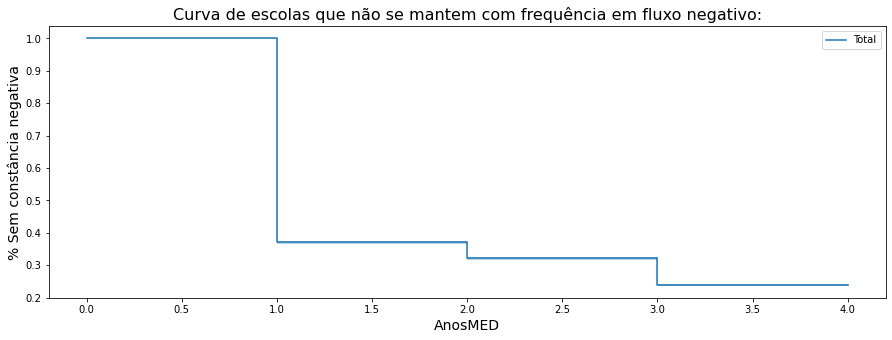

In [239]:
# Plotando os dadosright-censored
plt.figure(figsize=(15,5))
kmf.plot()
plt.xlabel('AnosMED',size=14)
plt.ylabel('% Sem constância negativa',size=14)
plt.title('Curva de escolas que não se mantem com frequência em fluxo negativo:',size=16)
plt.show()

In [240]:
def grafico_kaplanmeier(dados,nome):
    kmf = KaplanMeierFitter().fit(dados['AnosMED'],dados['Neg_StableM'],label=nome)
    kmf.plot()
    plt.xlabel('Tempo sem queda constante (Anos)',size=14)
    plt.ylabel('% ',size=14)
    plt.title('Curva de escolas que não se mantem com frequência em fluxo negativo:',size=16)

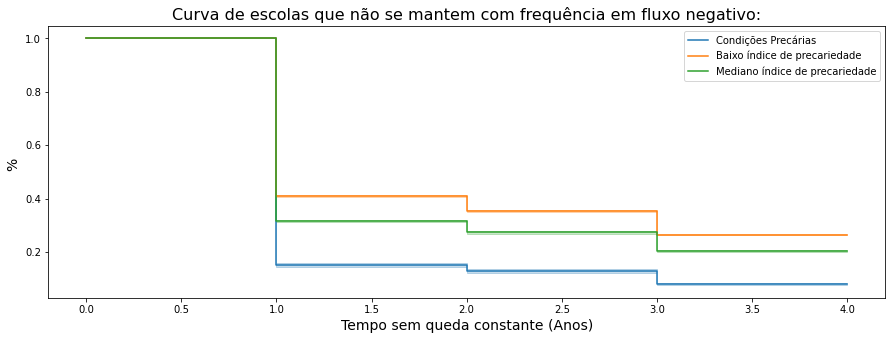

In [241]:
# Curvas de Kaplan-Meier para as variáveis
variavel = 'Grau_de_precariedade'
plt.figure(figsize=(15,5))
for i in df_finalMED[variavel].unique():
    #print(i)
    grafico_kaplanmeier(df_finalMED[df_finalMED[variavel]==i],nome=i)
    plt.legend()

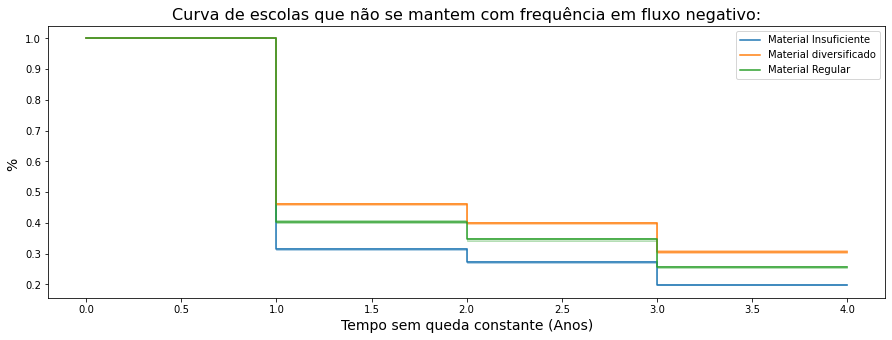

In [242]:
# Curvas de Kaplan-Meier para as variáveis
variavel = 'escore_Material'
plt.figure(figsize=(15,5))
for i in df_finalMED[variavel].unique():
    #print(i)
    grafico_kaplanmeier(df_finalMED[df_finalMED[variavel]==i],nome=i)
    plt.legend()

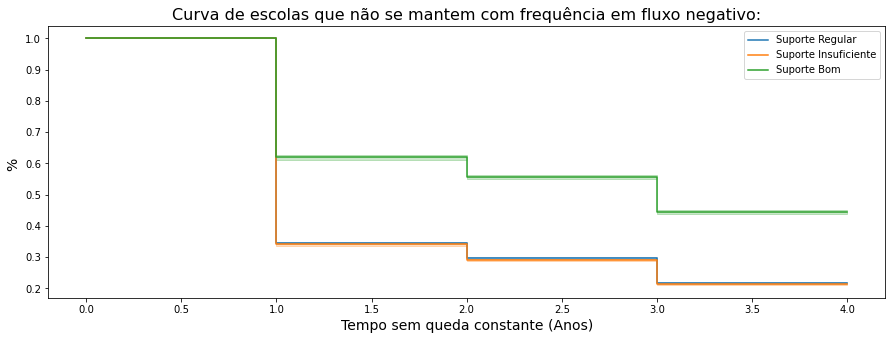

In [243]:
# Curvas de Kaplan-Meier para as variáveis
variavel = 'Suporte'
plt.figure(figsize=(15,5))
for i in df_finalMED[variavel].unique():
    #print(i)
    grafico_kaplanmeier(df_finalMED[df_finalMED[variavel]==i],nome=i)
    plt.legend()

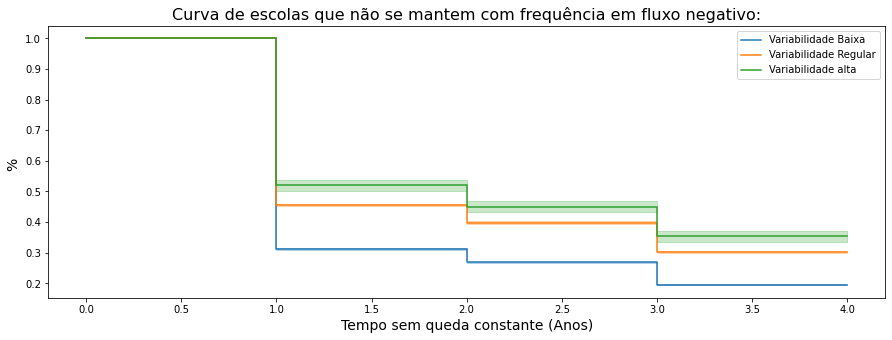

In [244]:
# Curvas de Kaplan-Meier para as variáveis
variavel = 'OUTROS_PROFISSIONAIS'
plt.figure(figsize=(15,5))
for i in df_finalMED[variavel].unique():
    #print(i)
    grafico_kaplanmeier(df_finalMED[df_finalMED[variavel]==i],nome=i)
    plt.legend()

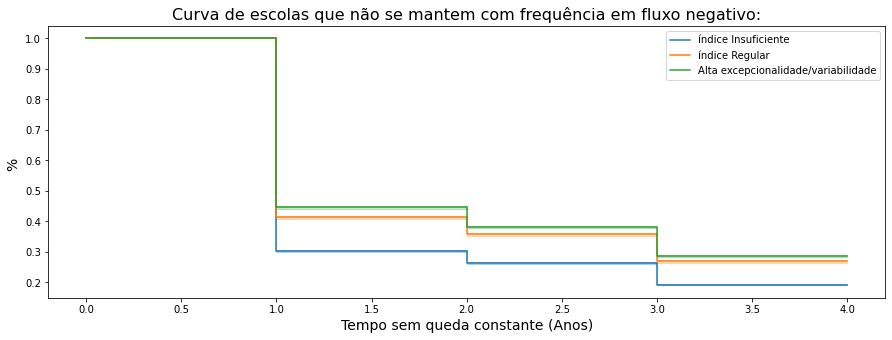

In [245]:
# Curvas de Kaplan-Meier para as variáveis
variavel = 'nível_da estrutura'
plt.figure(figsize=(15,5))
for i in df_finalMED[variavel].unique():
    #print(i)
    grafico_kaplanmeier(df_finalMED[df_finalMED[variavel]==i],nome=i)
    plt.legend()

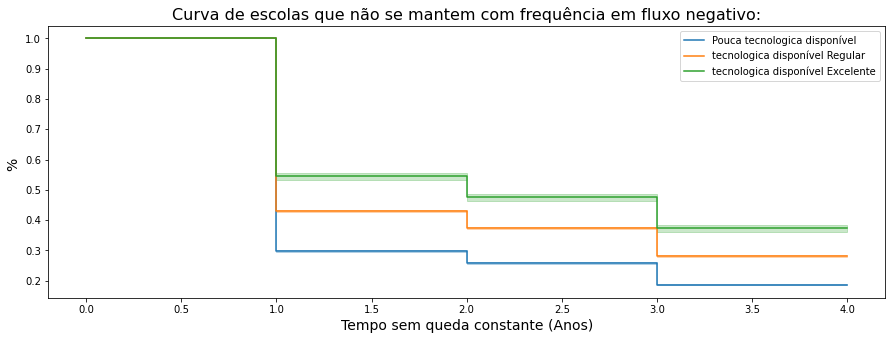

In [246]:
# Curvas de Kaplan-Meier para as variáveis
variavel = 'Tecnologia_disponivel'
plt.figure(figsize=(15,5))
for i in df_finalMED[variavel].unique():
    #print(i)
    grafico_kaplanmeier(df_finalMED[df_finalMED[variavel]==i],nome=i)
    plt.legend()

In [247]:
vars_categoricas = ['Grau_de_precariedade','escore_Material','nível_da estrutura','OUTROS_PROFISSIONAIS','Suporte','Tecnologia_disponivel']

In [248]:
from lifelines.statistics import multivariate_logrank_test
for i in vars_categoricas:
    teste = multivariate_logrank_test(df['AnosMED'], df[i], df['Neg_StableM']) 
    if teste.p_value<=0.05:
        print("Variável {}: TEM curvas diferentes".format(i))
    else:
        print("Variável {}: NÃO TEM curvas diferentes".format(i))

Variável Grau_de_precariedade: TEM curvas diferentes
Variável escore_Material: TEM curvas diferentes
Variável nível_da estrutura: TEM curvas diferentes
Variável OUTROS_PROFISSIONAIS: TEM curvas diferentes
Variável Suporte: TEM curvas diferentes
Variável Tecnologia_disponivel: TEM curvas diferentes


In [249]:
# análise Fundamental

In [250]:
df_nao_censurados= df[df.Neg_StableF==1]

In [251]:
df_finalFUND.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165684 entries, 0 to 165683
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   NO_ENTIDADE            165684 non-null  object  
 1   Neg_StableF            165684 non-null  float64 
 2   AnosFUND               165684 non-null  int64   
 3   Grau_de_precariedade   165684 non-null  category
 4   escore_Material        165684 non-null  category
 5   Suporte                165684 non-null  category
 6   OUTROS_PROFISSIONAIS   165684 non-null  object  
 7   nível_da estrutura     165684 non-null  category
 8   Tecnologia_disponivel  165684 non-null  object  
dtypes: category(4), float64(1), int64(1), object(3)
memory usage: 12.2+ MB


In [252]:
df.Neg_StableM.value_counts(normalize=True)

1.0    0.76017
0.0    0.23983
Name: Neg_StableM, dtype: float64

In [253]:
# Instanciando o construtor da curva
kmf = KaplanMeierFitter() 
# Usamos um .fit() para ajustar, fornecendo os dados de tempos de sobrevivência e censuras
kmf.fit(df_finalFUND['AnosFUND'],df_finalFUND['Neg_StableF'],label='Total') 

<lifelines.KaplanMeierFitter:"Total", fitted with 165684 total observations, 112740 right-censored observations>

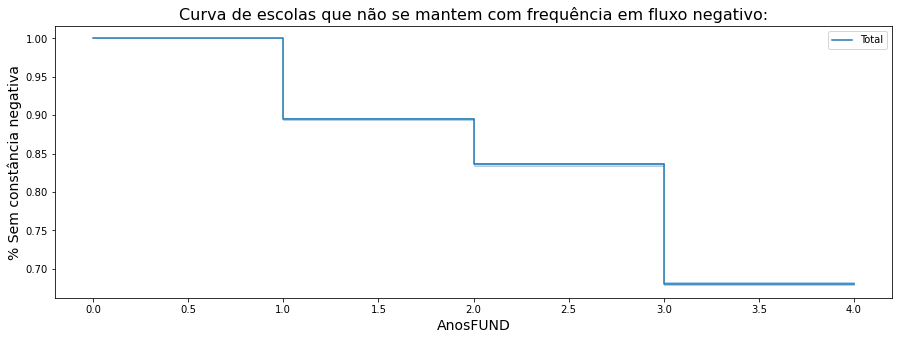

In [254]:
# Plotando os dadosright-censored
plt.figure(figsize=(15,5))
kmf.plot()
plt.xlabel('AnosFUND',size=14)
plt.ylabel('% Sem constância negativa',size=14)
plt.title('Curva de escolas que não se mantem com frequência em fluxo negativo:',size=16)
plt.show()

In [255]:
def grafico_kaplanmeier(dados,nome):
    kmf = KaplanMeierFitter().fit(dados['AnosFUND'],dados['Neg_StableF'],label=nome)
    kmf.plot()
    plt.xlabel('Tempo sem queda constante (Anos)',size=14)
    plt.ylabel('% ',size=14)
    plt.title('Curva de escolas que não se mantem com frequência em fluxo negativo:',size=16)

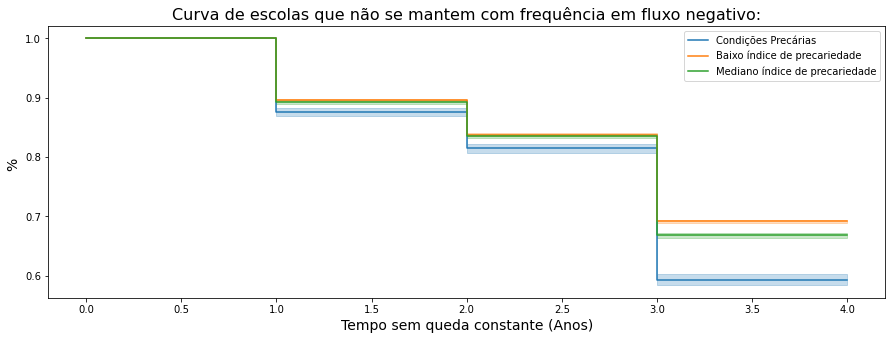

In [256]:
# Curvas de Kaplan-Meier para as variáveis
variavel = 'Grau_de_precariedade'
plt.figure(figsize=(15,5))
for i in df_finalFUND[variavel].unique():
    #print(i)
    grafico_kaplanmeier(df_finalFUND[df_finalFUND[variavel]==i],nome=i)
    plt.legend()

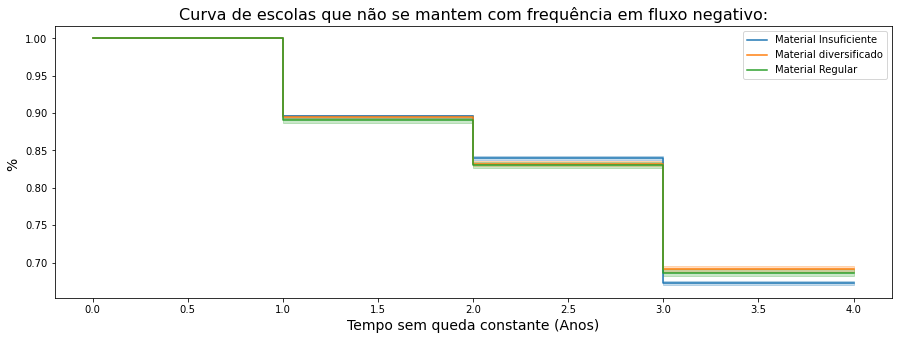

In [257]:
# Curvas de Kaplan-Meier para as variáveis
variavel = 'escore_Material'
plt.figure(figsize=(15,5))
for i in df_finalFUND[variavel].unique():
    #print(i)
    grafico_kaplanmeier(df_finalFUND[df_finalFUND[variavel]==i],nome=i)
    plt.legend()

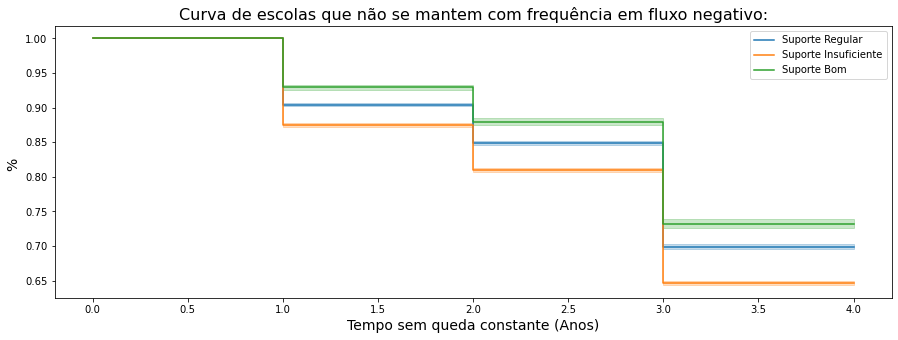

In [258]:
# Curvas de Kaplan-Meier para as variáveis
variavel = 'Suporte'
plt.figure(figsize=(15,5))
for i in df_finalFUND[variavel].unique():
    #print(i)
    grafico_kaplanmeier(df_finalFUND[df_finalFUND[variavel]==i],nome=i)
    plt.legend()

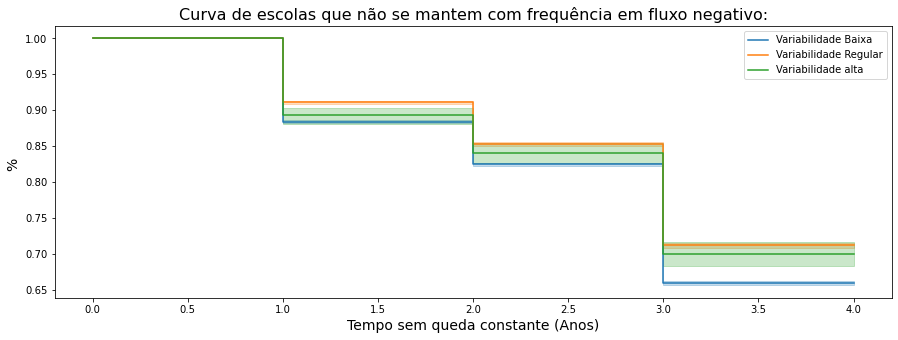

In [259]:
# Curvas de Kaplan-Meier para as variáveis
variavel = 'OUTROS_PROFISSIONAIS'
plt.figure(figsize=(15,5))
for i in df_finalFUND[variavel].unique():
    #print(i)
    grafico_kaplanmeier(df_finalFUND[df_finalFUND[variavel]==i],nome=i)
    plt.legend()

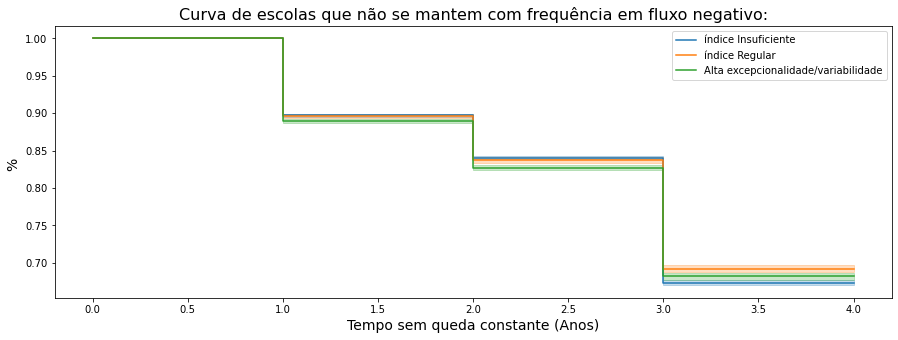

In [260]:
# Curvas de Kaplan-Meier para as variáveis
variavel = 'nível_da estrutura'
plt.figure(figsize=(15,5))
for i in df_finalFUND[variavel].unique():
    #print(i)
    grafico_kaplanmeier(df_finalFUND[df_finalFUND[variavel]==i],nome=i)
    plt.legend()

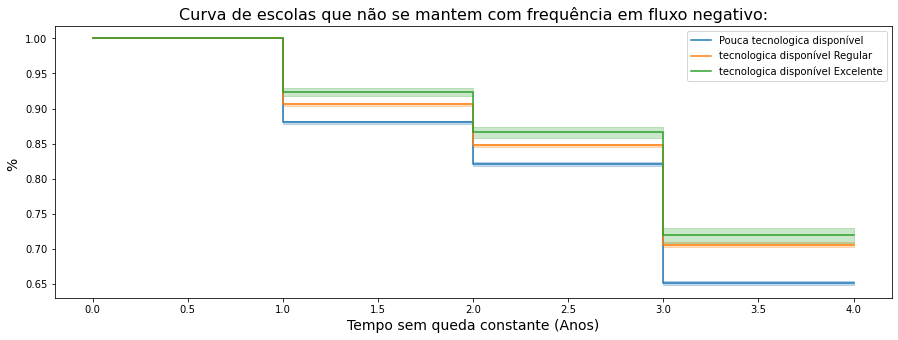

In [261]:
# Curvas de Kaplan-Meier para as variáveis
variavel = 'Tecnologia_disponivel'
plt.figure(figsize=(15,5))
for i in df_finalFUND[variavel].unique():
    #print(i)
    grafico_kaplanmeier(df_finalFUND[df_finalFUND[variavel]==i],nome=i)
    plt.legend()

In [262]:
from lifelines.statistics import multivariate_logrank_test
for i in vars_categoricas:
    teste = multivariate_logrank_test(df['AnosFUND'], df[i], df['Neg_StableF']) 
    if teste.p_value<=0.05:
        print("Variável {}: TEM curvas diferentes".format(i))
    else:
        print("Variável {}: NÃO TEM curvas diferentes".format(i))

Variável Grau_de_precariedade: TEM curvas diferentes
Variável escore_Material: TEM curvas diferentes
Variável nível_da estrutura: TEM curvas diferentes
Variável OUTROS_PROFISSIONAIS: TEM curvas diferentes
Variável Suporte: TEM curvas diferentes
Variável Tecnologia_disponivel: TEM curvas diferentes


# Conclusão da análise
* OBS: cada etapa ainda vai ser detalhada.
Foi possível ver que as variáveis têm influência, porém principalmente no ensino fundamental as diferenças são maiores entre alguns níveis, visto que alguns se confundem nos anos iniciais* vou explicar melhor depois*, as melhores condições sempre fazem que a escola consiga se manter em um estado recuperável e sobreviva a um estado crítico sem recuperação. No final, usamos um teste de hipótese não paramétrico para comparar cada curva.

#Modelos: * A variável alvo foi a taxa média de saída, aqui tentamos prever o comportamento da variável, foi feito um label
encoding para cada variável, um modelo teve performance melhor, o de nível médio, mesmo assim ainda não sei bem se está overfitando, será que a previsão ainda tá muito aquém? Faz algum sentido tentar seguir por esse caminho na modelagem?

In [552]:
cols = [ 'SG_UF',
'NO_MUNICIPIO','IN_BAS',
 'IN_INF',
 'IN_PROF',
 'IN_PROF_TEC',
 'IN_EJA',
 'IN_ESP'
]
df[cols]=df[cols].fillna(df.mode().iloc[0])

In [553]:
cols1 = [  'NO_ENTIDADE','AnosFUND', 'Grau_de_precariedade',
 'escore_Material','Suporte','OUTROS_PROFISSIONAIS','nível_da estrutura','Tecnologia_disponivel', 'taxa_fluxo_FUND' ,'SG_UF',
'NO_MUNICIPIO','Neg_StableF',
 'IN_EJA',
 'IN_ESP','IN_EAD']
cols2 = [  'NO_ENTIDADE','AnosMED', 'Grau_de_precariedade',
 'escore_Material','Suporte','OUTROS_PROFISSIONAIS','nível_da estrutura','Tecnologia_disponivel' ,
 'taxa_fluxo_MED','SG_UF','Neg_StableM',
'NO_MUNICIPIO',
 'IN_PROF',
 'IN_PROF_TEC',
 'IN_EJA',
 'IN_ESP','IN_EAD']
# 'fluxo_profs_MED21_17']
# 'IN_EJA',
 #'IN_ESP', 'IN_EAD',
# 'IN_BAS',
 #'IN_INF'

df_finalFUND= df[cols1]
df_finalMED = df[cols2]
#df_finalFUND = df_finalFUND.rename(columns={"Neg_StableF": "target"})
#df_finalMED = df_finalMED.rename(columns={"Neg_StableM": "target"})
#df_finalFUND = df_finalFUND.rename(columns={"fluxo_profs_FUND21_17": "target"})
#df_finalMED = df_finalMED.rename(columns={"fluxo_profs_MED21_17": "target"})
df_finalFUND = df_finalFUND.rename(columns={"taxa_fluxo_FUND": "target"})
df_finalMED = df_finalMED.rename(columns={"taxa_fluxo_MED": "target"})

In [554]:
df_finalFUND = df_finalFUND.astype(object)
df_finalMED = df_finalMED.astype(object)


In [555]:
df_finalMED['Grau_de_precariedade'].value_counts()

Baixo índice de precariedade      116770
Mediano índice de precariedade     39524
Condições Precárias                 9390
Name: Grau_de_precariedade, dtype: int64

In [556]:
df_finalMED.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165684 entries, 0 to 165683
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   NO_ENTIDADE            165684 non-null  object
 1   AnosMED                165684 non-null  object
 2   Grau_de_precariedade   165684 non-null  object
 3   escore_Material        165684 non-null  object
 4   Suporte                165684 non-null  object
 5   OUTROS_PROFISSIONAIS   165684 non-null  object
 6   nível_da estrutura     165684 non-null  object
 7   Tecnologia_disponivel  165684 non-null  object
 8   target                 165684 non-null  object
 9   SG_UF                  165684 non-null  object
 10  Neg_StableM            165684 non-null  object
 11  NO_MUNICIPIO           165684 non-null  object
 12  IN_PROF                165684 non-null  object
 13  IN_PROF_TEC            165684 non-null  object
 14  IN_EJA                 165684 non-null  object
 15  

In [557]:
df_finalFUND.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165684 entries, 0 to 165683
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   NO_ENTIDADE            165684 non-null  object
 1   AnosFUND               165684 non-null  object
 2   Grau_de_precariedade   165684 non-null  object
 3   escore_Material        165684 non-null  object
 4   Suporte                165684 non-null  object
 5   OUTROS_PROFISSIONAIS   165684 non-null  object
 6   nível_da estrutura     165684 non-null  object
 7   Tecnologia_disponivel  165684 non-null  object
 8   target                 165684 non-null  object
 9   SG_UF                  165684 non-null  object
 10  NO_MUNICIPIO           165684 non-null  object
 11  Neg_StableF            165684 non-null  object
 12  IN_EJA                 165684 non-null  object
 13  IN_ESP                 165684 non-null  object
 14  IN_EAD                 165684 non-null  object
dtype

In [558]:
df_finalMED

,NO_ENTIDADE,AnosMED,Grau_de_precariedade,escore_Material,Suporte,OUTROS_PROFISSIONAIS,nível_da estrutura,Tecnologia_disponivel,target,SG_UF,Neg_StableM,NO_MUNICIPIO,IN_PROF,IN_PROF_TEC,IN_EJA,IN_ESP,IN_EAD
0,EIEEF HAP BITT TUPARI,1,Condições Precárias,Material Insuficiente,Suporte Regular,Variabilidade Baixa,índice Insuficiente,Pouca tecnologica disponível,1,RO,1.0,Alta Floresta D'Oeste,0.0,0.0,0.0,0.0,0.0
1,CEEJA LUIZ VAZ DE CAMOES,1,Baixo índice de precariedade,Material Insuficiente,Suporte Regular,Variabilidade Regular,índice Insuficiente,tecnologica disponível Regular,1,RO,1.0,Alta Floresta D'Oeste,0.0,0.0,1.0,1.0,1.0
2,EMMEF 7 DE SETEMBRO,1,Mediano índice de precariedade,Material Insuficiente,Suporte Insuficiente,Variabilidade Baixa,índice Insuficiente,Pouca tecnologica disponível,1,RO,1.0,Alta Floresta D'Oeste,0.0,0.0,0.0,0.0,0.0
3,EMEIEF ANA NERY,1,Mediano índice de precariedade,Material diversificado,Suporte Regular,Variabilidade Baixa,índice Insuficiente,tecnologica disponível Regular,1,RO,1.0,Alta Floresta D'Oeste,0.0,0.0,0.0,1.0,0.0
4,EMEIEF BOA ESPERANCA,1,Mediano índice de precariedade,Material Regular,Suporte Regular,Variabilidade Baixa,índice Insuficiente,Pouca tecnologica disponível,1,RO,1.0,Alta Floresta D'Oeste,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165679,C DE CONVIVENCIA E EDUCACAO INFANTIL SAGRADA F...,2,Baixo índice de precariedade,Material diversificado,Suporte Regular,Variabilidade Baixa,índice Regular,tecnologica disponível Regular,0,DF,1.0,Brasília,0.0,0.0,0.0,1.0,0.0
165680,C DE CONVIVENCIA E EDUC INF NOSSA SENHORA DO C...,3,Baixo índice de precariedade,Material Insuficiente,Suporte Insuficiente,Variabilidade Baixa,Alta excepcionalidade/variabilidade,Pouca tecnologica disponível,0,DF,1.0,Brasília,0.0,0.0,0.0,1.0,0.0
165681,CEM 02 DE BRAZLANDIA,4,Baixo índice de precariedade,Material Insuficiente,Suporte Regular,Variabilidade Regular,Alta excepcionalidade/variabilidade,tecnologica disponível Excelente,0,DF,0.0,Brasília,0.0,0.0,1.0,1.0,0.0
165682,EC REINO DAS FLORES,4,Baixo índice de precariedade,Material diversificado,Suporte Regular,Variabilidade Baixa,índice Insuficiente,Pouca tecnologica disponível,0,DF,0.0,Brasília,0.0,0.0,0.0,1.0,0.0


In [559]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df_finalMED.SG_UF = le.fit_transform(df_finalMED.SG_UF)
df_finalMED.NO_MUNICIPIO = le.fit_transform(df_finalMED.NO_MUNICIPIO)
df_finalMED.AnosMED = le.fit_transform(df_finalMED.AnosMED)
df_finalMED.Grau_de_precariedade = le.fit_transform(df_finalMED.Grau_de_precariedade)
df_finalMED.escore_Material = le.fit_transform(df_finalMED.escore_Material)
df_finalMED.Suporte = le.fit_transform(df_finalMED.Suporte)
df_finalMED.OUTROS_PROFISSIONAIS = le.fit_transform(df_finalMED.OUTROS_PROFISSIONAIS)
df_finalMED['nível_da estrutura'] = le.fit_transform(df_finalMED['nível_da estrutura'])
df_finalMED.Tecnologia_disponivel = le.fit_transform(df_finalMED.Tecnologia_disponivel)
df_finalMED.target = le.fit_transform(df_finalMED.target)
df_finalMED.Neg_StableM = le.fit_transform(df_finalMED.Neg_StableM)
#df_finalMED.taxa_fluxo_MED = le.fit_transform(df_finalMED.taxa_fluxo_MED)
#df_finalMED.IN_BAS = le.fit_transform(df_finalMED.IN_BAS)
#df_finalMED.IN_INF = le.fit_transform(df_finalMED.IN_INF)
df_finalMED.IN_PROF = le.fit_transform(df_finalMED.IN_PROF)
df_finalMED.IN_PROF_TEC = le.fit_transform(df_finalMED.IN_PROF_TEC)
df_finalMED.IN_EJA = le.fit_transform(df_finalMED.IN_EJA)
df_finalMED.IN_ESP = le.fit_transform(df_finalMED.IN_ESP)
df_finalMED.IN_EAD = le.fit_transform(df_finalMED.IN_EAD)




In [560]:
#MED:

In [561]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)

In [562]:
def plot_proportion(y_true):
  plt.style.use("ggplot")
  aux = (
      pd.Series(y_true).value_counts()
      .reset_index().rename({"index": "class", 0: "samples"}, axis=1)
  )
  fig, ax = plt.subplots(figsize=(12,5))
  ax = sns.barplot(data=aux, x="class", y="target", ax=ax)
  ax.bar_label(ax.containers[0])

In [563]:
def predict(cls, X_train, y_train, X_test, y_test, name):
  dt.fit(X_train, y_train)
  y_pred_proba = cls.predict_proba(X_test)[:,1]
  metrics = evaluate(y_test, y_pred_proba)
  metrics["name"] = name
  return metrics, y_pred_proba

def evaluate(y_true, y_pred_proba, threshold=0.5):
  y_pred = (y_pred_proba >= threshold).astype(int)
  results = dict()
  results["accuracy"] = accuracy_score(y_true, y_pred)
  results["precision"] = precision_score(y_true, y_pred)
  results["recall"] = recall_score(y_true, y_pred)
  results["f1"] = f1_score(y_true, y_pred)
  return results

def append(df, row):
  return pd.concat([df, pd.DataFrame([row])]).sort_values("f1", ascending=False)

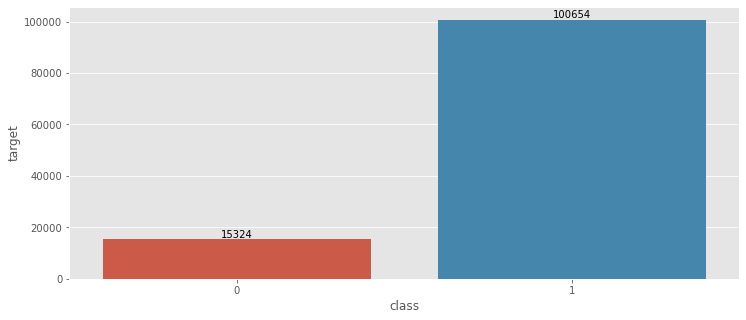

In [564]:
X = df_finalMED.drop(['NO_ENTIDADE', 'target'], axis=1)
y = df_finalMED['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

plot_proportion(y_train)

In [565]:
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train, y_train)
bench_metrics, y_pred_proba = predict(dt, X_train, y_train, X_test, y_test, 'Baseline')
bench_metrics

{'accuracy': 0.9022049651953487,
 'precision': 0.9050771221861541,
 'recall': 0.9910096176183617,
 'f1': 0.9460960977611196,
 'name': 'Baseline'}

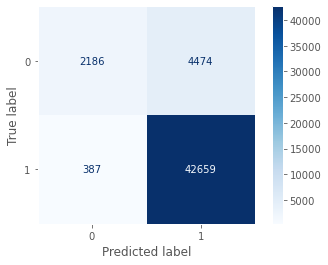

In [566]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, (y_pred_proba >= 0.5).astype(int), cmap="Blues")
plt.grid(False)

In [567]:
evaluations = pd.DataFrame()
evaluations = append(evaluations, bench_metrics)
evaluations

,accuracy,precision,recall,f1,name
0,0.902205,0.905077,0.99101,0.946096,Baseline


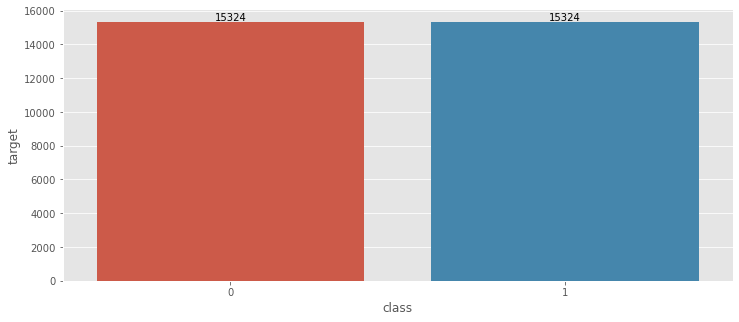

In [568]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)
plot_proportion(y_res)

In [569]:
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
rus_metrics, y_pred_proba = predict(dt, X_res, y_res, X_test, y_test, 'RandomUnderSampling')
evaluations = append(evaluations, rus_metrics)
evaluations

,accuracy,precision,recall,f1,name
0,0.902205,0.905077,0.991010,0.946096,Baseline
0,0.763429,1.000000,0.726827,0.841806,RandomUnderSampling


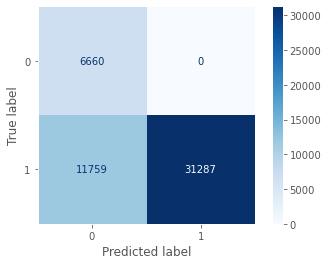

In [570]:
ConfusionMatrixDisplay.from_predictions(y_test, (y_pred_proba >= 0.4).astype(int), cmap="Blues")
plt.grid(False)

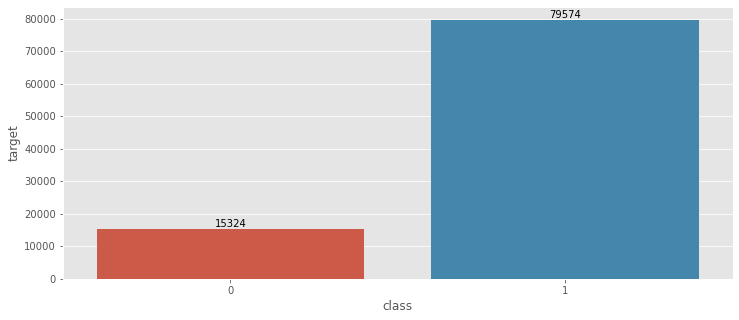

In [571]:
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours(kind_sel="all", n_neighbors=3)
X_res, y_res = enn.fit_resample(X_train, y_train)
plot_proportion(y_res)

In [572]:
enn_metrics, y_pred_proba = predict(dt, X_res, y_res, X_test, y_test, 'EditedNearestNeighbours')
evaluations = append(evaluations, enn_metrics)
evaluations

,accuracy,precision,recall,f1,name
0,0.902205,0.905077,0.991010,0.946096,Baseline
0,0.881865,0.924186,0.940761,0.932400,EditedNearestNeighbours
0,0.763429,1.000000,0.726827,0.841806,RandomUnderSampling


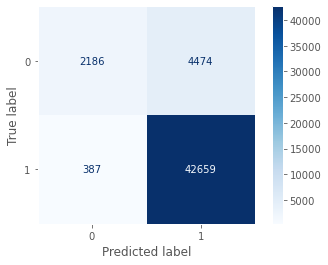

In [573]:
ConfusionMatrixDisplay.from_predictions(y_test, (y_pred_proba >= 0.4).astype(int), cmap="Blues")
plt.grid(False)

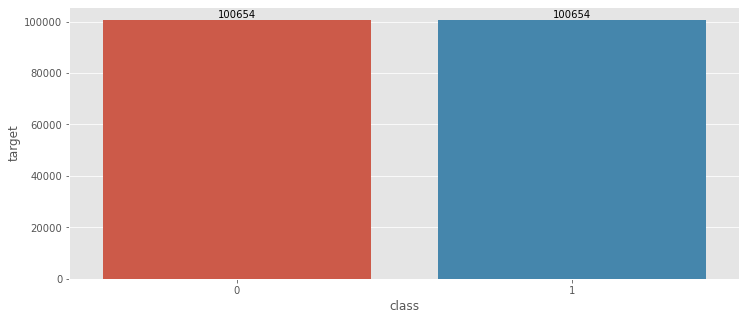

In [574]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
plot_proportion(y_res)

In [575]:
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
ros_metrics, y_pred_proba = predict(dt, X_res, y_res, X_test, y_test, 'RandomOverSampling')
evaluations = append(evaluations, ros_metrics)
evaluations

,accuracy,precision,recall,f1,name
0,0.902205,0.905077,0.991010,0.946096,Baseline
0,0.881865,0.924186,0.940761,0.932400,EditedNearestNeighbours
0,0.763429,1.000000,0.726827,0.841806,RandomUnderSampling
0,0.763429,1.000000,0.726827,0.841806,RandomOverSampling


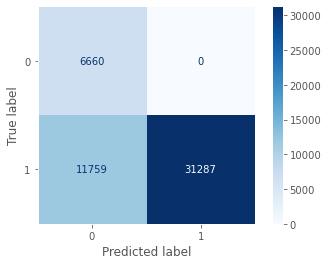

In [576]:
ConfusionMatrixDisplay.from_predictions(y_test, (y_pred_proba >= 0.4).astype(int), cmap="Blues")
plt.grid(False)

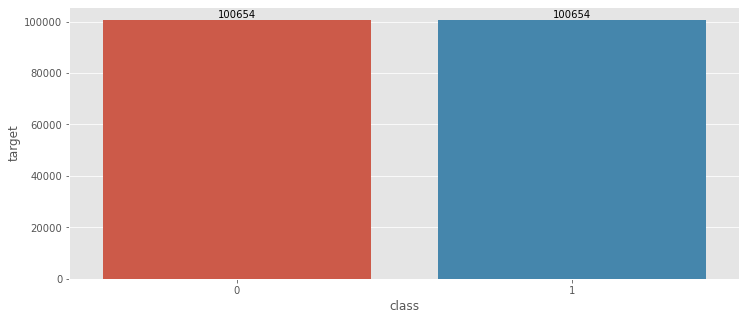

In [577]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)
plot_proportion(y_res)

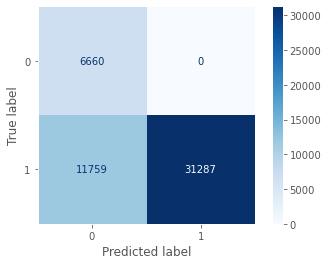

In [578]:
ConfusionMatrixDisplay.from_predictions(y_test, (y_pred_proba >= 0.4).astype(int), cmap="Blues")
plt.grid(False)

In [579]:
smote_metrics, y_pred_proba = predict(dt, X_res, y_res, X_test, y_test, 'SMOTE')
evaluations = append(evaluations, smote_metrics)
evaluations

,accuracy,precision,recall,f1,name
0,0.902205,0.905077,0.991010,0.946096,Baseline
0,0.881865,0.924186,0.940761,0.932400,EditedNearestNeighbours
0,0.802619,0.971432,0.795475,0.874692,SMOTE
0,0.763429,1.000000,0.726827,0.841806,RandomUnderSampling
0,0.763429,1.000000,0.726827,0.841806,RandomOverSampling


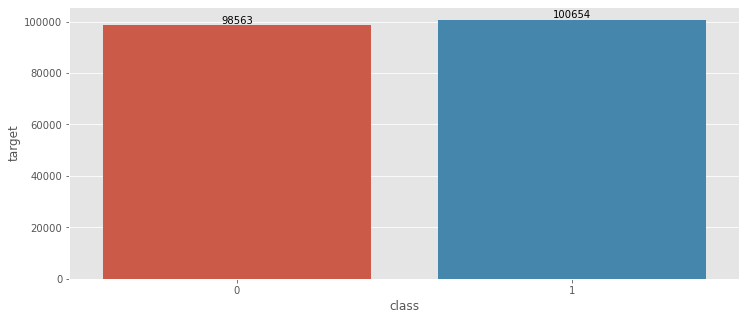

In [580]:
adasyn = ADASYN(random_state=42)
X_res, y_res = adasyn.fit_resample(X_train, y_train)
plot_proportion(y_res)

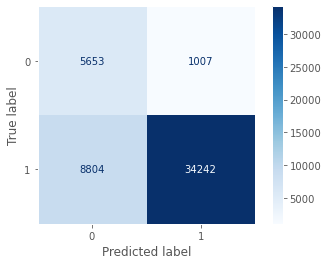

In [581]:
ConfusionMatrixDisplay.from_predictions(y_test, (y_pred_proba >= 0.4).astype(int), cmap="Blues")
plt.grid(False)

In [582]:
adasyn_metrics, y_pred_proba = predict(dt, X_res, y_res, X_test, y_test, "ADASYN")
evaluations = append(evaluations, adasyn_metrics)
evaluations

,accuracy,precision,recall,f1,name
0,0.902205,0.905077,0.991010,0.946096,Baseline
0,0.881865,0.924186,0.940761,0.932400,EditedNearestNeighbours
0,0.802619,0.971432,0.795475,0.874692,SMOTE
0,0.802619,0.971432,0.795475,0.874692,ADASYN
0,0.763429,1.000000,0.726827,0.841806,RandomUnderSampling
0,0.763429,1.000000,0.726827,0.841806,RandomOverSampling


In [583]:
rf = RandomForestClassifier(random_state=42, n_estimators=45)
rf.fit(X_train,y_train)
rf_metric, y_pred_proba = predict(rf, X_train, y_train, X_test, y_test, "RandomForestBaseline")
evaluations = append(evaluations, rf_metric)
evaluations

,accuracy,precision,recall,f1,name
0,0.902205,0.905077,0.991010,0.946096,Baseline
0,0.890355,0.924353,0.951238,0.937603,RandomForestBaseline
0,0.881865,0.924186,0.940761,0.932400,EditedNearestNeighbours
0,0.802619,0.971432,0.795475,0.874692,SMOTE
0,0.802619,0.971432,0.795475,0.874692,ADASYN
0,0.763429,1.000000,0.726827,0.841806,RandomUnderSampling
0,0.763429,1.000000,0.726827,0.841806,RandomOverSampling


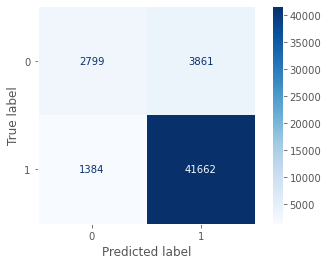

In [584]:
ConfusionMatrixDisplay.from_predictions(y_test, (y_pred_proba >= 0.4).astype(int), cmap="Blues")
plt.grid(False)

In [585]:
#!pip install xgboost
import xgboost 

In [586]:
boost = xgboost.XGBClassifier(n_jobs=-1,random_state=42)
boost.fit(X_train,y_train)
boost_metric, y_pred_proba = predict(boost, X_train, y_train, X_test, y_test, "xgboost")
evaluations = append(evaluations, boost_metric)
evaluations

,accuracy,precision,recall,f1,name
0,0.912606,0.923881,0.979812,0.951025,xgboost
0,0.902205,0.905077,0.991010,0.946096,Baseline
0,0.890355,0.924353,0.951238,0.937603,RandomForestBaseline
0,0.881865,0.924186,0.940761,0.932400,EditedNearestNeighbours
0,0.802619,0.971432,0.795475,0.874692,SMOTE
0,0.802619,0.971432,0.795475,0.874692,ADASYN
0,0.763429,1.000000,0.726827,0.841806,RandomUnderSampling
0,0.763429,1.000000,0.726827,0.841806,RandomOverSampling


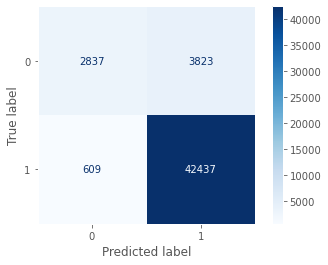

In [587]:
ConfusionMatrixDisplay.from_predictions(y_test, (y_pred_proba >= 0.4).astype(int), cmap="Blues")
plt.grid(False)

In [588]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier(n_jobs=-1)
KNeighborsClassifier.fit(X_train,y_train)
KNeighborsClassifier_metric, y_pred_proba = predict(KNeighborsClassifier, X_train, y_train, X_test, y_test, "KNeighborsClassifier")
evaluations = append(evaluations, KNeighborsClassifier_metric)
evaluations

,accuracy,precision,recall,f1,name
0,0.912606,0.923881,0.979812,0.951025,xgboost
0,0.902205,0.905077,0.991010,0.946096,Baseline
0,0.890355,0.924353,0.951238,0.937603,RandomForestBaseline
0,0.881865,0.924186,0.940761,0.932400,EditedNearestNeighbours
0,0.857723,0.885078,0.960414,0.921209,KNeighborsClassifier
0,0.802619,0.971432,0.795475,0.874692,SMOTE
0,0.802619,0.971432,0.795475,0.874692,ADASYN
0,0.763429,1.000000,0.726827,0.841806,RandomUnderSampling
0,0.763429,1.000000,0.726827,0.841806,RandomOverSampling


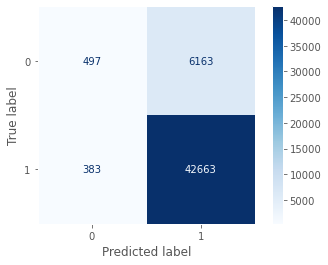

In [589]:
ConfusionMatrixDisplay.from_predictions(y_test, (y_pred_proba >= 0.4).astype(int), cmap="Blues")
plt.grid(False)

In [590]:
from sklearn.naive_bayes import GaussianNB
modelg = GaussianNB()
modelg.fit(X_train,y_train)
modelg_metrics, y_pred_proba = predict(modelg, X_train, y_train, X_test, y_test, "modelgaussiannb")
evaluations = append(evaluations, modelg_metrics)
evaluations

,accuracy,precision,recall,f1,name
0,0.912606,0.923881,0.979812,0.951025,xgboost
0,0.902205,0.905077,0.991010,0.946096,Baseline
0,0.890355,0.924353,0.951238,0.937603,RandomForestBaseline
0,0.881865,0.924186,0.940761,0.932400,EditedNearestNeighbours
0,0.857723,0.885078,0.960414,0.921209,KNeighborsClassifier
0,0.802619,0.971432,0.795475,0.874692,SMOTE
0,0.802619,0.971432,0.795475,0.874692,ADASYN
0,0.769263,0.904989,0.819612,0.860187,modelgaussiannb
0,0.763429,1.000000,0.726827,0.841806,RandomUnderSampling
0,0.763429,1.000000,0.726827,0.841806,RandomOverSampling


In [591]:
from sklearn.model_selection import GridSearchCV

In [592]:
param_grid = {
    "min_samples_leaf": list(range(2, 9, 3)),
    "max_depth": list(range(1,100,10)),
    "n_estimators": list([100,200,500,1000]),
}

In [593]:
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

model_gridsearch = GridSearchCV(
  estimator=rf_model,
  param_grid=param_grid,
  scoring='f1',
)

In [594]:
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth = 21, min_samples_leaf = 2, n_estimators = 200)
rf_model.fit(X_train,y_train)
rf_model_metrics, y_pred_proba = predict(rf_model, X_train, y_train, X_test, y_test, "RandomForestCV")
evaluations = append(evaluations, rf_model_metrics)
evaluations

,accuracy,precision,recall,f1,name
0,0.912606,0.923881,0.979812,0.951025,xgboost
0,0.907074,0.918531,0.979580,0.948074,RandomForestCV
0,0.902205,0.905077,0.991010,0.946096,Baseline
0,0.890355,0.924353,0.951238,0.937603,RandomForestBaseline
0,0.881865,0.924186,0.940761,0.932400,EditedNearestNeighbours
0,0.857723,0.885078,0.960414,0.921209,KNeighborsClassifier
0,0.802619,0.971432,0.795475,0.874692,SMOTE
0,0.802619,0.971432,0.795475,0.874692,ADASYN
0,0.769263,0.904989,0.819612,0.860187,modelgaussiannb
0,0.763429,1.000000,0.726827,0.841806,RandomUnderSampling


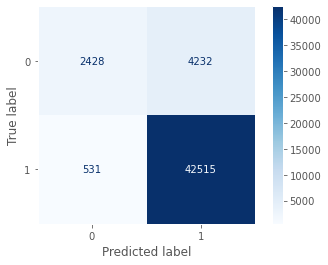

In [595]:
ConfusionMatrixDisplay.from_predictions(y_test, (y_pred_proba >= 0.4).astype(int), cmap="Blues")
plt.grid(False)

In [596]:
#ANÁLISE FUND:

In [597]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df_finalFUND.SG_UF = le.fit_transform(df_finalFUND.SG_UF)
df_finalFUND.NO_MUNICIPIO = le.fit_transform(df_finalFUND.NO_MUNICIPIO)
df_finalFUND.AnosFUND = le.fit_transform(df_finalFUND.AnosFUND)
df_finalFUND.Grau_de_precariedade = le.fit_transform(df_finalFUND.Grau_de_precariedade)
df_finalFUND.escore_Material = le.fit_transform(df_finalFUND.escore_Material)
df_finalFUND.Suporte = le.fit_transform(df_finalFUND.Suporte)
df_finalFUND.OUTROS_PROFISSIONAIS = le.fit_transform(df_finalFUND.OUTROS_PROFISSIONAIS)
df_finalFUND['nível_da estrutura'] = le.fit_transform(df_finalFUND['nível_da estrutura'])
df_finalFUND.Tecnologia_disponivel = le.fit_transform(df_finalFUND.Tecnologia_disponivel)
df_finalFUND.target = le.fit_transform(df_finalFUND.target)
df_finalFUND.Neg_StableF = le.fit_transform(df_finalFUND.Neg_StableF)
df_finalFUND.IN_EJA = le.fit_transform(df_finalFUND.IN_EJA)
df_finalFUND.IN_ESP = le.fit_transform(df_finalFUND.IN_ESP)
df_finalFUND.IN_EAD = le.fit_transform(df_finalFUND.IN_EAD)



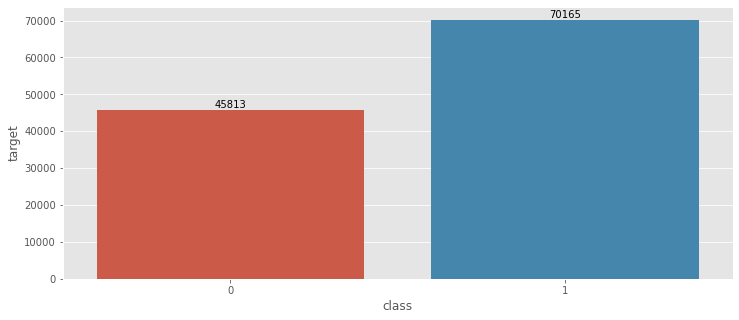

In [598]:
X = df_finalFUND.drop(['NO_ENTIDADE', 'target'], axis=1)
y = df_finalFUND['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

plot_proportion(y_train)

In [599]:
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train, y_train)
bench_metrics, y_pred_proba = predict(dt, X_train, y_train, X_test, y_test, 'Baseline')
bench_metrics

{'accuracy': 0.6157003178690701,
 'precision': 0.6126722675164508,
 'recall': 0.9871965857562016,
 'f1': 0.7560969381240583,
 'name': 'Baseline'}

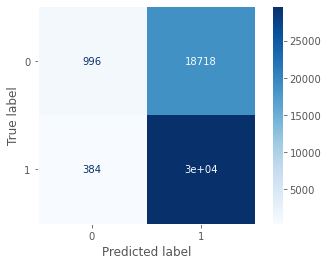

In [600]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, (y_pred_proba >= 0.5).astype(int), cmap="Blues")
plt.grid(False)

In [601]:
evaluations = pd.DataFrame()
evaluations = append(evaluations, bench_metrics)
evaluations

,accuracy,precision,recall,f1,name
0,0.6157,0.612672,0.987197,0.756097,Baseline


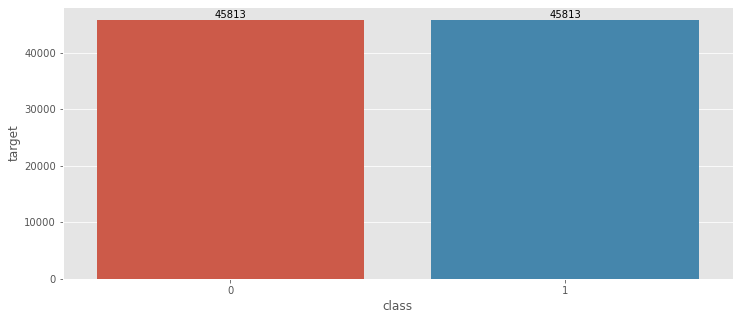

In [602]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)
plot_proportion(y_res)

In [603]:
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
rus_metrics, y_pred_proba = predict(dt, X_res, y_res, X_test, y_test, 'RandomUnderSampling')
evaluations = append(evaluations, rus_metrics)
evaluations

,accuracy,precision,recall,f1,name
0,0.615700,0.612672,0.987197,0.756097,Baseline
0,0.579025,0.848919,0.367765,0.513202,RandomUnderSampling


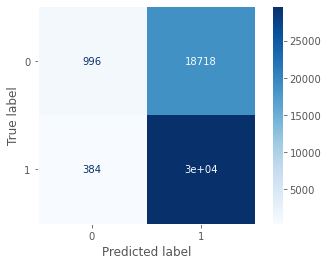

In [604]:
ConfusionMatrixDisplay.from_predictions(y_test, (y_pred_proba >= 0.4).astype(int), cmap="Blues")
plt.grid(False)

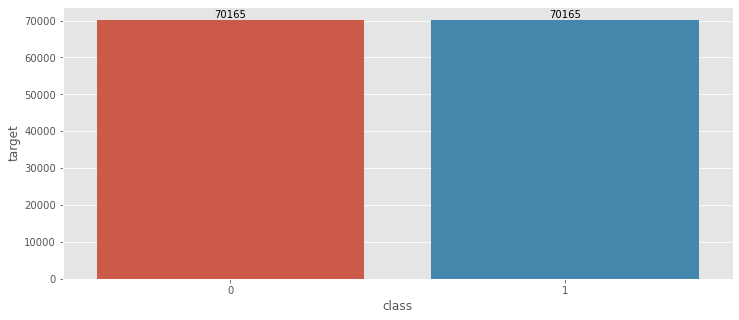

In [605]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)
plot_proportion(y_res)

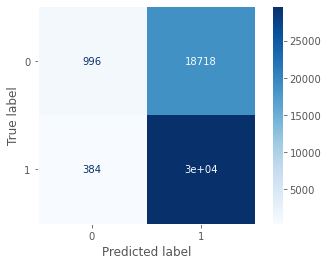

In [606]:
ConfusionMatrixDisplay.from_predictions(y_test, (y_pred_proba >= 0.4).astype(int), cmap="Blues")
plt.grid(False)

In [607]:
smote_metrics, y_pred_proba = predict(dt, X_res, y_res, X_test, y_test, 'SMOTE')
evaluations = append(evaluations, smote_metrics)
evaluations

,accuracy,precision,recall,f1,name
0,0.615700,0.612672,0.987197,0.756097,Baseline
0,0.579025,0.848919,0.367765,0.513202,RandomUnderSampling
0,0.579025,0.848919,0.367765,0.513202,SMOTE


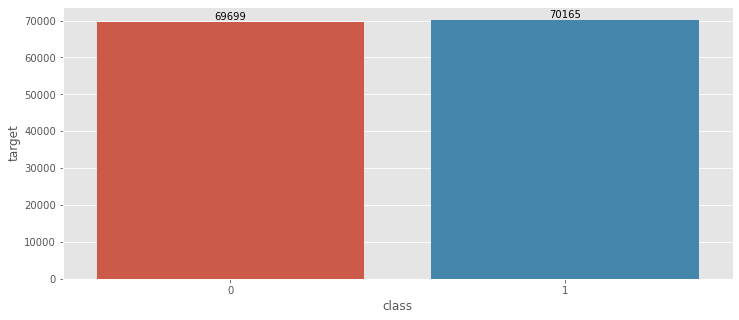

In [608]:
adasyn = ADASYN(random_state=42)
X_res, y_res = adasyn.fit_resample(X_train, y_train)
plot_proportion(y_res)

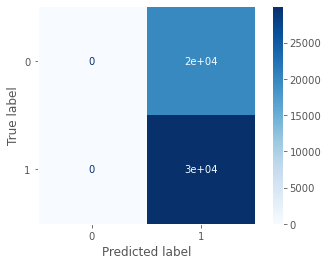

In [609]:
ConfusionMatrixDisplay.from_predictions(y_test, (y_pred_proba >= 0.4).astype(int), cmap="Blues")
plt.grid(False)

In [610]:
adasyn_metrics, y_pred_proba = predict(dt, X_res, y_res, X_test, y_test, "ADASYN")
evaluations = append(evaluations, adasyn_metrics)
evaluations

,accuracy,precision,recall,f1,name
0,0.615700,0.612672,0.987197,0.756097,Baseline
0,0.579025,0.848919,0.367765,0.513202,RandomUnderSampling
0,0.579025,0.848919,0.367765,0.513202,SMOTE
0,0.579025,0.848919,0.367765,0.513202,ADASYN


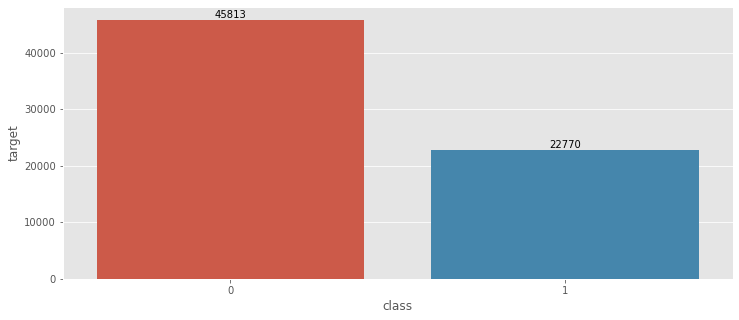

In [611]:
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours(kind_sel="all", n_neighbors=3)
X_res, y_res = enn.fit_resample(X_train, y_train)
plot_proportion(y_res)

In [612]:
enn_metrics, y_pred_proba = predict(dt, X_res, y_res, X_test, y_test, 'EditedNearestNeighbours')
evaluations = append(evaluations, enn_metrics)
evaluations

,accuracy,precision,recall,f1,name
0,0.615700,0.612672,0.987197,0.756097,Baseline
0,0.579025,0.848919,0.367765,0.513202,RandomUnderSampling
0,0.579025,0.848919,0.367765,0.513202,SMOTE
0,0.579025,0.848919,0.367765,0.513202,ADASYN
0,0.516296,0.980145,0.202454,0.335590,EditedNearestNeighbours


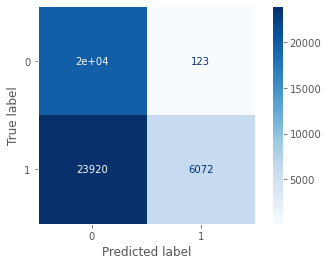

In [613]:
ConfusionMatrixDisplay.from_predictions(y_test, (y_pred_proba >= 0.4).astype(int), cmap="Blues")
plt.grid(False)

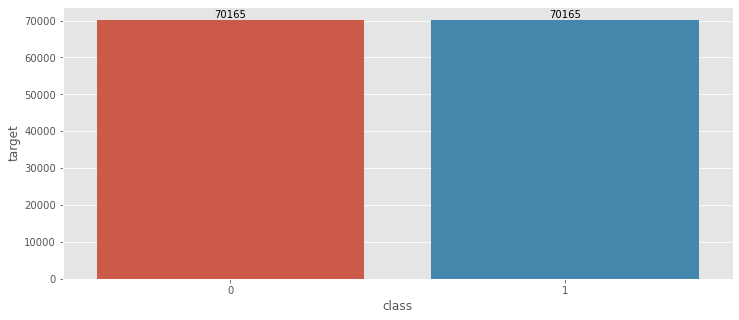

In [614]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
plot_proportion(y_res)

In [615]:
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
ros_metrics, y_pred_proba = predict(dt, X_res, y_res, X_test, y_test, 'RandomOverSampling')
evaluations = append(evaluations, ros_metrics)
evaluations

,accuracy,precision,recall,f1,name
0,0.615700,0.612672,0.987197,0.756097,Baseline
0,0.579025,0.848919,0.367765,0.513202,RandomUnderSampling
0,0.579025,0.848919,0.367765,0.513202,SMOTE
0,0.579025,0.848919,0.367765,0.513202,ADASYN
0,0.579025,0.848919,0.367765,0.513202,RandomOverSampling
0,0.516296,0.980145,0.202454,0.335590,EditedNearestNeighbours


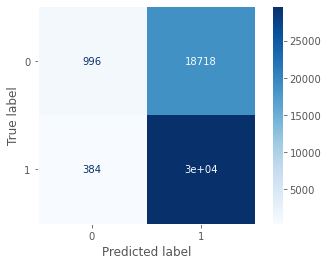

In [616]:
ConfusionMatrixDisplay.from_predictions(y_test, (y_pred_proba >= 0.4).astype(int), cmap="Blues")
plt.grid(False)

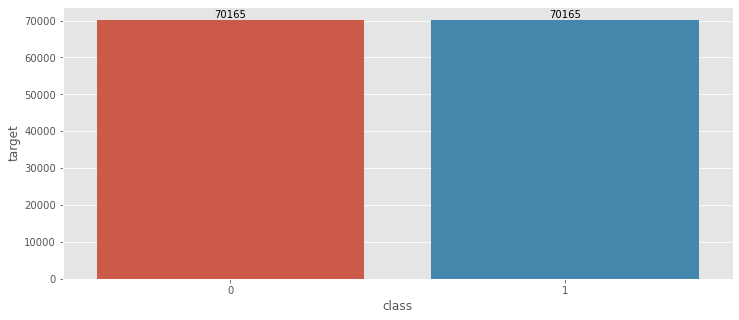

In [617]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)
plot_proportion(y_res)

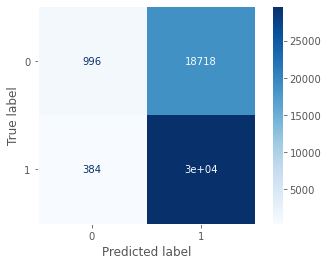

In [618]:
ConfusionMatrixDisplay.from_predictions(y_test, (y_pred_proba >= 0.4).astype(int), cmap="Blues")
plt.grid(False)

In [619]:
smote_metrics, y_pred_proba = predict(dt, X_res, y_res, X_test, y_test, 'SMOTE')
evaluations = append(evaluations, smote_metrics)
evaluations

,accuracy,precision,recall,f1,name
0,0.615700,0.612672,0.987197,0.756097,Baseline
0,0.579025,0.848919,0.367765,0.513202,RandomUnderSampling
0,0.579025,0.848919,0.367765,0.513202,SMOTE
0,0.579025,0.848919,0.367765,0.513202,ADASYN
0,0.579025,0.848919,0.367765,0.513202,RandomOverSampling
0,0.579025,0.848919,0.367765,0.513202,SMOTE
0,0.516296,0.980145,0.202454,0.335590,EditedNearestNeighbours


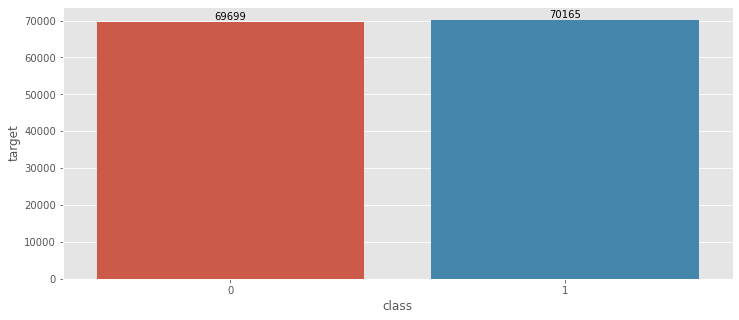

In [620]:
adasyn = ADASYN(random_state=42)
X_res, y_res = adasyn.fit_resample(X_train, y_train)
plot_proportion(y_res)

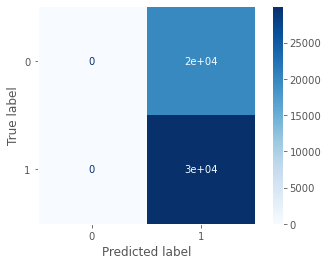

In [621]:
ConfusionMatrixDisplay.from_predictions(y_test, (y_pred_proba >= 0.4).astype(int), cmap="Blues")
plt.grid(False)

In [622]:
adasyn_metrics, y_pred_proba = predict(dt, X_res, y_res, X_test, y_test, "ADASYN")
evaluations = append(evaluations, adasyn_metrics)
evaluations

,accuracy,precision,recall,f1,name
0,0.615700,0.612672,0.987197,0.756097,Baseline
0,0.579025,0.848919,0.367765,0.513202,RandomUnderSampling
0,0.579025,0.848919,0.367765,0.513202,SMOTE
0,0.579025,0.848919,0.367765,0.513202,ADASYN
0,0.579025,0.848919,0.367765,0.513202,RandomOverSampling
0,0.579025,0.848919,0.367765,0.513202,SMOTE
0,0.579025,0.848919,0.367765,0.513202,ADASYN
0,0.516296,0.980145,0.202454,0.335590,EditedNearestNeighbours


In [623]:
rf = RandomForestClassifier(random_state=42, n_estimators=45)
rf.fit(X_train,y_train)
rf_metric, y_pred_proba = predict(rf, X_train, y_train, X_test, y_test, "RandomForestBaseline")
evaluations = append(evaluations, rf_metric)
evaluations

,accuracy,precision,recall,f1,name
0,0.615700,0.612672,0.987197,0.756097,Baseline
0,0.609001,0.667396,0.701687,0.684112,RandomForestBaseline
0,0.579025,0.848919,0.367765,0.513202,RandomUnderSampling
0,0.579025,0.848919,0.367765,0.513202,SMOTE
0,0.579025,0.848919,0.367765,0.513202,ADASYN
0,0.579025,0.848919,0.367765,0.513202,RandomOverSampling
0,0.579025,0.848919,0.367765,0.513202,SMOTE
0,0.579025,0.848919,0.367765,0.513202,ADASYN
0,0.516296,0.980145,0.202454,0.335590,EditedNearestNeighbours


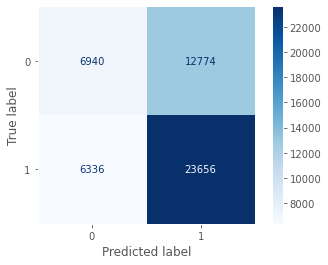

In [624]:
ConfusionMatrixDisplay.from_predictions(y_test, (y_pred_proba >= 0.4).astype(int), cmap="Blues")
plt.grid(False)

In [625]:
#!pip install xgboost
import xgboost 

In [626]:
boost = xgboost.XGBClassifier(n_jobs=-1,random_state=42)
boost.fit(X_train,y_train)
boost_metric, y_pred_proba = predict(boost, X_train, y_train, X_test, y_test, "xgboost")
evaluations = append(evaluations, boost_metric)
evaluations

,accuracy,precision,recall,f1,name
0,0.615700,0.612672,0.987197,0.756097,Baseline
0,0.645174,0.664641,0.831488,0.738761,xgboost
0,0.609001,0.667396,0.701687,0.684112,RandomForestBaseline
0,0.579025,0.848919,0.367765,0.513202,RandomUnderSampling
0,0.579025,0.848919,0.367765,0.513202,SMOTE
0,0.579025,0.848919,0.367765,0.513202,ADASYN
0,0.579025,0.848919,0.367765,0.513202,RandomOverSampling
0,0.579025,0.848919,0.367765,0.513202,SMOTE
0,0.579025,0.848919,0.367765,0.513202,ADASYN
0,0.516296,0.980145,0.202454,0.335590,EditedNearestNeighbours


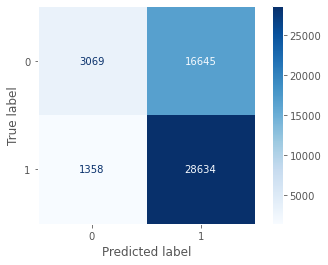

In [627]:
ConfusionMatrixDisplay.from_predictions(y_test, (y_pred_proba >= 0.4).astype(int), cmap="Blues")
plt.grid(False)

In [628]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier(n_jobs=-1)
KNeighborsClassifier.fit(X_train,y_train)
KNeighborsClassifier_metric, y_pred_proba = predict(KNeighborsClassifier, X_train, y_train, X_test, y_test, "KNeighborsClassifier")
evaluations = append(evaluations, KNeighborsClassifier_metric)
evaluations

,accuracy,precision,recall,f1,name
0,0.615700,0.612672,0.987197,0.756097,Baseline
0,0.645174,0.664641,0.831488,0.738761,xgboost
0,0.609001,0.667396,0.701687,0.684112,RandomForestBaseline
0,0.593912,0.654096,0.693985,0.673451,KNeighborsClassifier
0,0.579025,0.848919,0.367765,0.513202,RandomUnderSampling
0,0.579025,0.848919,0.367765,0.513202,SMOTE
0,0.579025,0.848919,0.367765,0.513202,ADASYN
0,0.579025,0.848919,0.367765,0.513202,RandomOverSampling
0,0.579025,0.848919,0.367765,0.513202,SMOTE
0,0.579025,0.848919,0.367765,0.513202,ADASYN


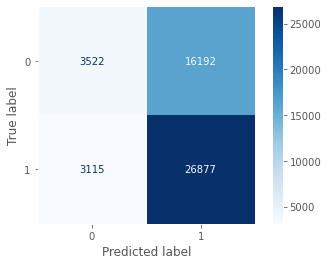

In [629]:
ConfusionMatrixDisplay.from_predictions(y_test, (y_pred_proba >= 0.4).astype(int), cmap="Blues")
plt.grid(False)

In [630]:
from sklearn.naive_bayes import GaussianNB
modelg = GaussianNB()
modelg.fit(X_train,y_train)
modelg_metrics, y_pred_proba = predict(modelg, X_train, y_train, X_test, y_test, "modelgaussiannb")
evaluations = append(evaluations, modelg_metrics)
evaluations

,accuracy,precision,recall,f1,name
0,0.615700,0.612672,0.987197,0.756097,Baseline
0,0.645174,0.664641,0.831488,0.738761,xgboost
0,0.609001,0.667396,0.701687,0.684112,RandomForestBaseline
0,0.593912,0.654096,0.693985,0.673451,KNeighborsClassifier
0,0.578341,0.783326,0.416344,0.543705,modelgaussiannb
0,0.579025,0.848919,0.367765,0.513202,RandomUnderSampling
0,0.579025,0.848919,0.367765,0.513202,SMOTE
0,0.579025,0.848919,0.367765,0.513202,ADASYN
0,0.579025,0.848919,0.367765,0.513202,RandomOverSampling
0,0.579025,0.848919,0.367765,0.513202,SMOTE


In [631]:
from sklearn.model_selection import GridSearchCV

In [632]:
param_grid = {
    "min_samples_leaf": list(range(2, 9, 3)),
    "max_depth": list(range(1,100,10)),
    "n_estimators": list([100,200,500,1000]),
}

In [633]:
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

model_gridsearch = GridSearchCV(
  estimator=rf_model,
  param_grid=param_grid,
  scoring='f1',
)

In [634]:
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth = 21, min_samples_leaf = 2, n_estimators = 200)
rf_model.fit(X_train,y_train)
rf_model_metrics, y_pred_proba = predict(rf_model, X_train, y_train, X_test, y_test, "RandomForestCV")
evaluations = append(evaluations, rf_model_metrics)
evaluations

,accuracy,precision,recall,f1,name
0,0.615700,0.612672,0.987197,0.756097,Baseline
0,0.645174,0.664641,0.831488,0.738761,xgboost
0,0.633243,0.669023,0.776140,0.718612,RandomForestCV
0,0.609001,0.667396,0.701687,0.684112,RandomForestBaseline
0,0.593912,0.654096,0.693985,0.673451,KNeighborsClassifier
0,0.578341,0.783326,0.416344,0.543705,modelgaussiannb
0,0.579025,0.848919,0.367765,0.513202,RandomUnderSampling
0,0.579025,0.848919,0.367765,0.513202,SMOTE
0,0.579025,0.848919,0.367765,0.513202,ADASYN
0,0.579025,0.848919,0.367765,0.513202,RandomOverSampling


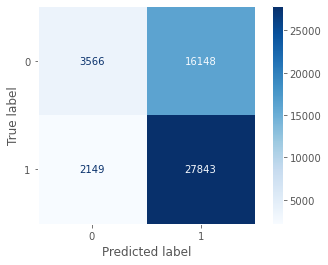

In [635]:
ConfusionMatrixDisplay.from_predictions(y_test, (y_pred_proba >= 0.4).astype(int), cmap="Blues")
plt.grid(False)